# Social Network Analysis - Amber Heard Case - YouTube

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>YouTube - Social Network Analysis on Amber Heard's Case 

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

https://stackoverflow.com/questions/24719368/syntaxerror-non-default-argument-follows-default-argument/39942121

In [2]:
cd ../Filtered Data/comments_cleaned

/Users/mnagy99/jupyter/AH/YouTube_Bot_Analysis/Filtered Data/comments_cleaned


|          Column          |                          Definition                          |
| :----------------------- | :----------------------------------------------------------- |
| etag                     | Record (entity tag); **Unique for each record**                 |
| tl_etag                  | Top Level Comment eTag                                       |
| tl_id                    | Top Level Comment ID                                         |
| tl_video_id              | Top Level Comment Video ID                                   |
| tl_text                  | Top Level Comment Text                                       |
| tl_author_display_name   | Top Level Comment Display name **Not Unique**                |
| tl_author_channed_id     | Top Level Comment Channel ID   **Unique for each Author**    |
| tl_n_likes               | Top Level Comment Number of Likes                            |
| tl_comment_puplish_dtime | Top Level Comment Number Publish Date Time                   |
| tl_comment_update_time   | Top Level Comment Number Update Date Time                    |
| n_replies                | Number of Replies of each record                             |
| replies.comments         | UNDER INVESTIGATIONS                                         |
| tl_moderation_status     | Top Level Comment Moderation Status (Classified Spam or Not) |

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [3]:
df_comments = pd.read_csv("comments_cleaned_zipped.csv", compression='zip',
                          low_memory=False, lineterminator='\n')

df_comments["p_dtime"] = pd.to_datetime(df_comments["p_dtime"])
df_comments["date"] = pd.to_datetime(df_comments["date"])
df_comments["u_dtime"] = pd.to_datetime(df_comments["u_dtime"])

print(df_comments.shape)
df_comments.head()

(2176543, 20)


video_id                 comment_etag            comment_id  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC   
1  VPUUrdgxIa8  XpsHQJXeW3QznSOnkHg2LFrp-dU  UggV-BvKpFaaaHgCoAEC   
2  VPUUrdgxIa8  VRefhV-4H8413hvRHP5-zKWyNuQ  Ugio47Mc-eG0dHgCoAEC   
3  VPUUrdgxIa8  auBUVEx3Zm2I35CN0iASII7-3V4  Ugj0tLP9hfrMkXgCoAEC   
4  VPUUrdgxIa8  6NhfYEJJ6zK5ieP-jD9dB25SC-k  Ughdfu9Z390BW3gCoAEC   

                                                text  \
0                                         good work!   
1                     fake lesbian career boost fail   
2  so during movie shoots some actresses use dild...   
3  god liam hemsworth looks insanely a lot like h...   
4                        i'd watch her day and night   

                                           username              author_ch_id  \
0                                     Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q   
1                                      Vincent Lyle  UCSKuFV9GWVXgh3dtdKCxZoQ   
2  Soluchi {Michael Jackson Lookalike, Dancer, VFX}  UCQb__wEpi5q8_xhkuk2jm5g   
3                                     Chris Andreev  UCseIHRwQ0oAAXK2-e8E2_FA   
4                                Dzimka Bujiashvili  UCzPTU13Mb7dO1jgIbHp2ABw   

   nlikes                   p_dtime                   u_dtime  nreplies  \
0     9.0 2013-11-29 05:18:47+00:00 2013-11-29 05:18:47+00:00       1.0   
1     2.0 2013-12-27 21:05:54+00:00 2013-12-27 21:05:54+00:00       0.0   
2  2093.0 2013-12-26 01:24:40+00:00 2013-12-26 01:24:40+00:00       7.0   
3     0.0 2013-12-07 21:22:41+00:00 2013-12-07 21:22:41+00:00       3.0   
4     7.0 2013-12-04 23:01:35+00:00 2013-12-04 23:01:35+00:00       0.0   

  moderation_status comment_reply parent_id author_ch_url  \
0               NaN       comment      none          none   
1               NaN       comment      none          none   
2               NaN       comment      none          none   
3               NaN       comment      none          none   
4               NaN       comment      none          none   

  author_profile_image  year       date month  dayofmonth  hour  
0                 none  2013 2013-11-29   Nov          29     5  
1                 none  2013 2013-12-27   Dec          27    21  
2                 none  2013 2013-12-26   Dec          26     1  
3                 none  2013 2013-12-07   Dec           7    21  
4                 none  2013 2013-12-04   Dec           4    23

In [4]:
df_comments.p_dtime.dt.date.min(), df_comments.p_dtime.dt.date.max()

(datetime.date(2008, 3, 26), datetime.date(2021, 12, 8))

In [5]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176543 entries, 0 to 2176542
Data columns (total 20 columns):
 #   Column                Dtype              
---  ------                -----              
 0   video_id              object             
 1   comment_etag          object             
 2   comment_id            object             
 3   text                  object             
 4   username              object             
 5   author_ch_id          object             
 6   nlikes                float64            
 7   p_dtime               datetime64[ns, UTC]
 8   u_dtime               datetime64[ns, UTC]
 9   nreplies              float64            
 10  moderation_status     object             
 11  comment_reply         object             
 12  parent_id             object             
 13  author_ch_url         object             
 14  author_profile_image  object             
 15  year                  int64              
 16  date                  datetime64[ns]

In [6]:
helpers.isnull(df_comments)

The number of NaNs in video_id: 0
The number of NaNs in comment_etag: 0
The number of NaNs in comment_id: 0
The number of NaNs in text: 532
The number of NaNs in username: 49
The number of NaNs in author_ch_id: 23
The number of NaNs in nlikes: 0
The number of NaNs in p_dtime: 0
The number of NaNs in u_dtime: 0
The number of NaNs in nreplies: 0
The number of NaNs in moderation_status: 2174298
The number of NaNs in comment_reply: 0
The number of NaNs in parent_id: 0
The number of NaNs in author_ch_url: 0
The number of NaNs in author_profile_image: 0
The number of NaNs in year: 0
The number of NaNs in date: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0


In [7]:
df_comments.dropna(subset=['text'], inplace=True)

In [8]:
sum(df_comments.p_dtime != df_comments.u_dtime)

133253

In [9]:
for col in ['year', 'username', 'moderation_status', 'comment_reply']:
    print('The value counts of ' + col)
    print(df_comments[col].value_counts().head())
    print('\n')

The value counts of year
2020    893138
2021    792578
2018    192108
2019    118408
2016     54618
Name: year, dtype: int64


The value counts of username
Johnny Depp       15986
eHacker            8343
JOHNNY DEPP        3921
Stevie J Raw       3516
LaraCroftEyes1     3270
Name: username, dtype: int64


The value counts of moderation_status
likelySpam    2240
Name: moderation_status, dtype: int64


The value counts of comment_reply
comment    1692570
reply       483441
Name: comment_reply, dtype: int64




<br>

In [10]:
df_creations = pd.read_csv('daily_creations.csv')
df_creations.date = pd.to_datetime(df_creations.date)
print(df_creations.shape)
df_creations.head()

(76597, 8)


date  year month  dayofmonth  hour  ncomments  nreplies  nlikes
0 2018-07-21  2018   Jul          21    20       6998      2994   38909
1 2018-07-21  2018   Jul          21    19       4877      2181   30351
2 2020-10-24  2020   Oct          24     8       4404      1121   24569
3 2018-07-21  2018   Jul          21    21       3153      1087   16811
4 2018-11-19  2018   Nov          19    17       2673      1775   21042

<br>

In [11]:
# Create an empty set of negatively commenting users
neg_users = set()

In [12]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [13]:
# Those users were checked and did not find negative comments
checked_set = {'eHacker', 'Stevie J Raw', 'DarthN3ws', "Nerdette's NewsStand", 'Sunshine', 'Binge Central',
               'Abbey Sharp', 'ko 3', 'Mary Shephard', 'Madison Beer', 'Baby Bunny', 'LadyDominion',
               'Tom Harlock', 'Gus Johnson', 'Mr. Bruhhh', 'Crypto Info 2', 'demi demi', '8-Bit Tex', 'Ty Y', 
               'Incredibly Average', 'DELCARAJO TV', 'Flashback FM','Funeral bug', 'Stranger In the Alps', 
               "Nerdette's NewsStand"}

In [14]:
neg_users = neg_users - checked_set

In [15]:
len(neg_users)

228339

<br>

<a id='text_investigation'></a>
> ## Primary Text Investigation
> <ul>
 <li><a href="#text_investigation"><b>Primary Text Investigation</b></a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In This Section: 
- We will investigate the text related to Amber in the data to extract the most repeated "keywords" to further use in the analysis.

### Contains Amber

In [16]:
df_comments[df_comments.text.str.contains('amber')].text.value_counts().head(60)

they won't believe you because you are a man amber heard                                                                                                                                                                                                                                                                                                                                                                                                                                 2253
they won't believe you because you are a man amber heard she is not a victim                                                                                                                                                                                                                                                                                                                                                                                                             1599
amber turd                                  

In [17]:
df_comments[df_comments.text.str.contains('with amber')].text.value_counts().head(60)

i will never watch a movie with amber heard in it many others feel the same way i personally know what it is like to be falsely accused by a woman                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### Contains Johnny

In [18]:
df_comments[df_comments.text.str.contains('johnny')].text.value_counts().head()

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                 2800
ًں’“thanks for your utmost love and support which has brought me this far it has been a hard time for me but your support has got me standing even in difficult times i can't appreciate enough the support of fans who have been really active with issues relating to meprivate message on telegram @johnnydeppllofficial  ًں’“ much love â‌¤ï¸ڈ    2786
justice for johnny                                                                                                                                                                                                                                                                                                

### Contains F*ck

In [19]:
df_fuck = df_comments[df_comments.text.str.contains('fuck')]
print(f'{df_fuck.shape[0]} contributions, on {df_fuck.video_id.nunique()} Videos, made by {df_fuck.username.nunique()} Users')


39421 contributions, on 2161 Videos, made by 32874 Users


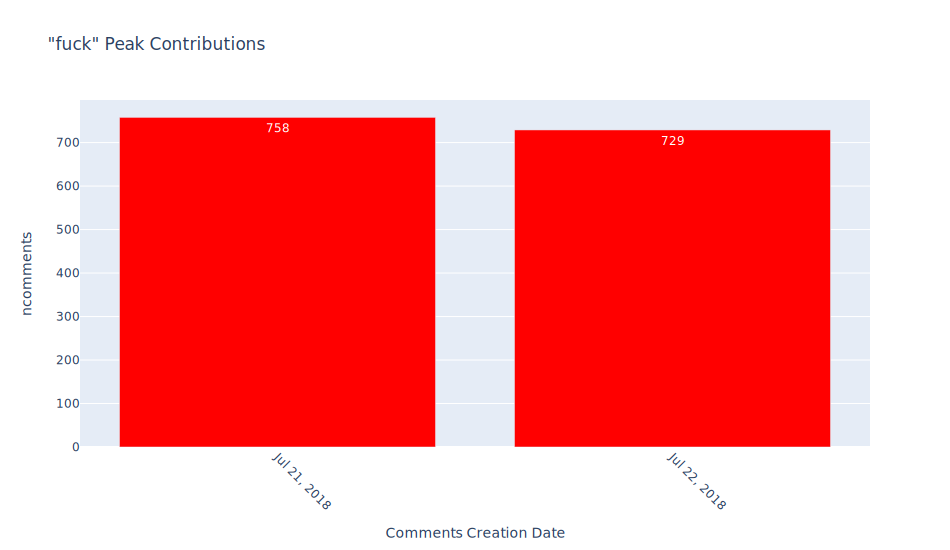

In [20]:
helpers.keyword_peaks(df_comments, 'fuck', n=2, threshold=0)

In [21]:
df_fuck.text.value_counts().head(60)

fuck amber heard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Contains B*tch

In [22]:
df_bitch = df_comments[df_comments.text.str.contains('bitch')]
print(f'{df_bitch.shape[0]} contributions, on {df_bitch.video_id.nunique()} Videos, made by {df_bitch.username.nunique()} Users')


19839 contributions, on 1856 Videos, made by 16322 Users


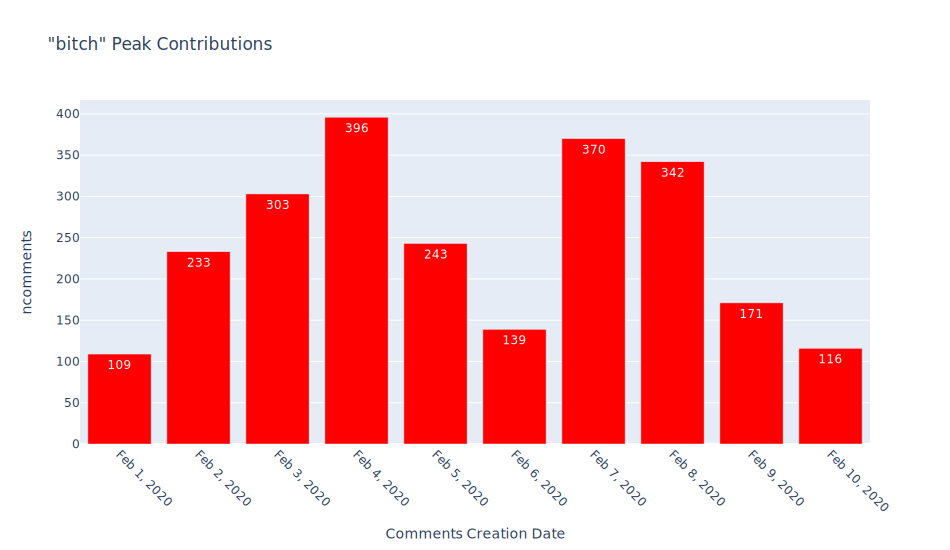

In [23]:
helpers.keyword_peaks(df_comments, 'bitch', n=10, threshold=0)

In [24]:
df_bitch.text.value_counts().head(60)

bitch                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### Contains Abuser

In [25]:
df_abuser = df_comments[df_comments.text.str.contains('abus')]
print(f'{df_abuser.shape[0]} contributions, on {df_abuser.video_id.nunique()} Videos, made by {df_abuser.username.nunique()} Users')


100415 contributions, on 3503 Videos, made by 57256 Users


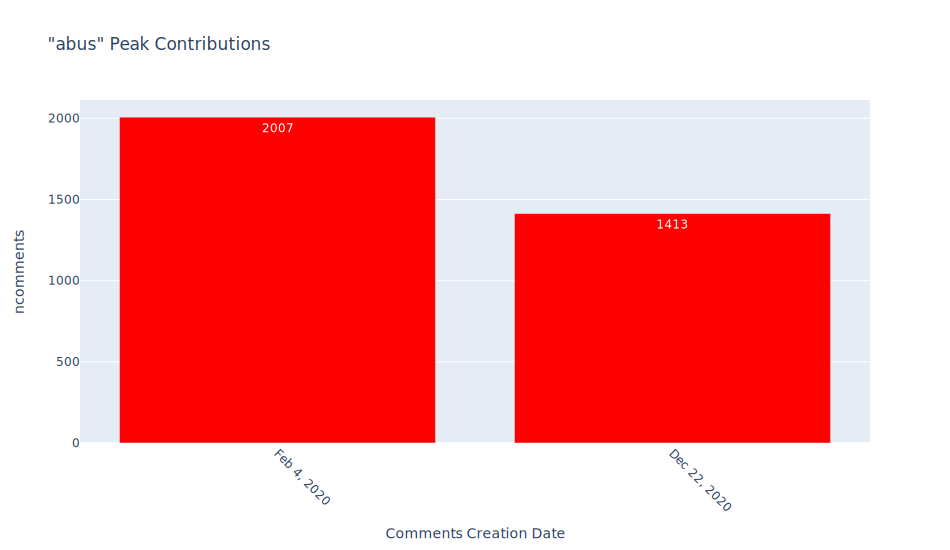

In [26]:
helpers.keyword_peaks(df_comments, 'abus', n=2, threshold=0)

In [29]:
df_abuser.text.value_counts().head(60)

abuser                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Contains Liar

In [30]:
df_liar = df_comments[df_comments.text.str.contains('liar')]
print(f'{df_liar.shape[0]} contributions, on {df_liar.video_id.nunique()} Videos, made by {df_liar.username.nunique()} Users')


19020 contributions, on 2565 Videos, made by 12767 Users


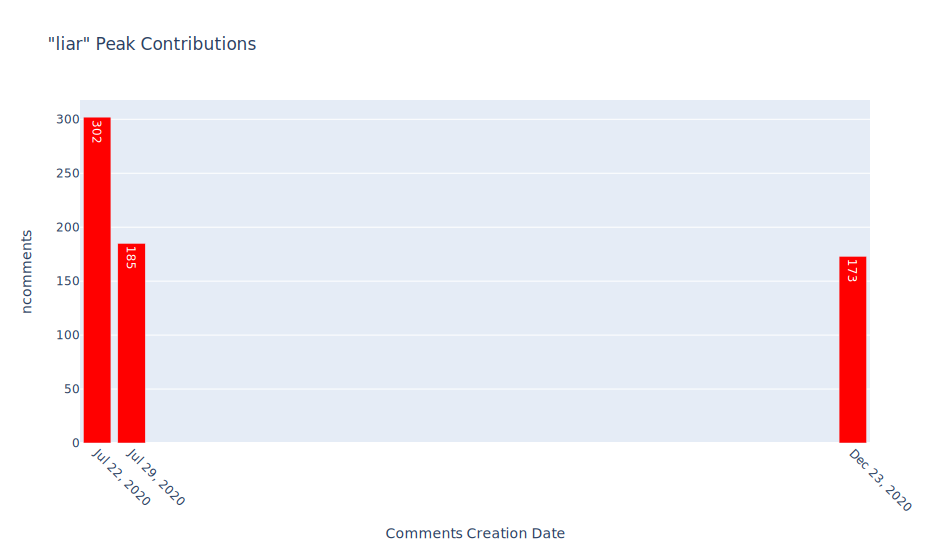

In [31]:
helpers.keyword_peaks(df_comments, 'liar', n=3, threshold=0)

In [32]:
df_liar.text.value_counts().head(60)

liar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Contains Crazy

In [33]:
df_crazy = df_comments[df_comments.text.str.contains('crazy')]
print(f'{df_crazy.shape[0]} contributions, on {df_crazy.video_id.nunique()} Videos, made by {df_crazy.username.nunique()} Users')


33681 contributions, on 2179 Videos, made by 26678 Users


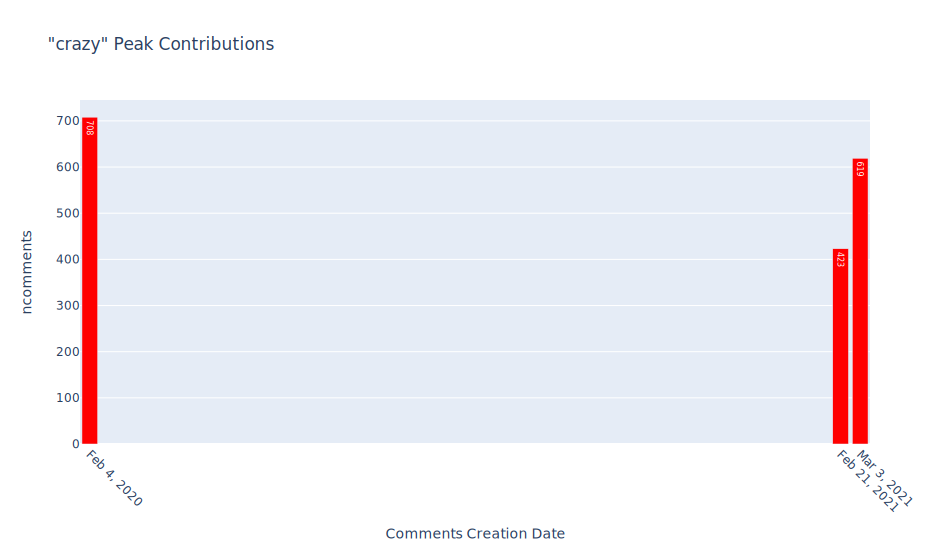

In [34]:
helpers.keyword_peaks(df_comments, 'crazy', n=3, threshold=0)

In [35]:
df_crazy.text.value_counts().head(60)

that's crazy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Contains Disgusting

In [36]:
df_disgusting = df_comments[df_comments.text.str.contains('disgusting')]
print(f'{df_disgusting.shape[0]} contributions, on {df_disgusting.video_id.nunique()} Videos, made by {df_disgusting.username.nunique()} Users')


12716 contributions, on 1937 Videos, made by 9763 Users


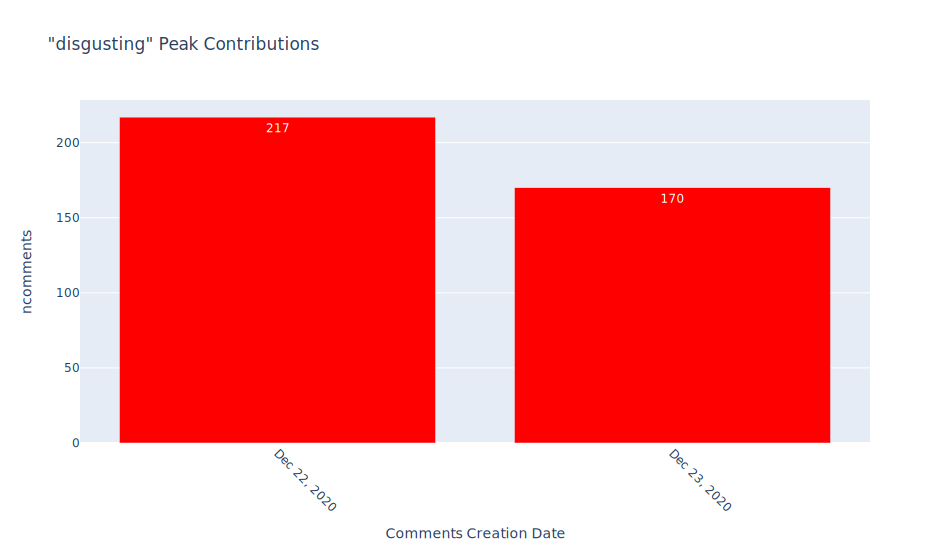

In [37]:
# importlib.reload(helpers)
helpers.keyword_peaks(df_comments, 'disgusting', n=2, threshold=0)

In [38]:
df_disgusting.text.value_counts().head(60)

disgusting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Contains Jail

In [39]:
df_jail = df_comments[df_comments.text.str.contains('jail')]
print(f'{df_jail.shape[0]} contributions, on {df_jail.video_id.nunique()} Videos, made by {df_jail.username.nunique()} Users')


18937 contributions, on 2203 Videos, made by 13168 Users


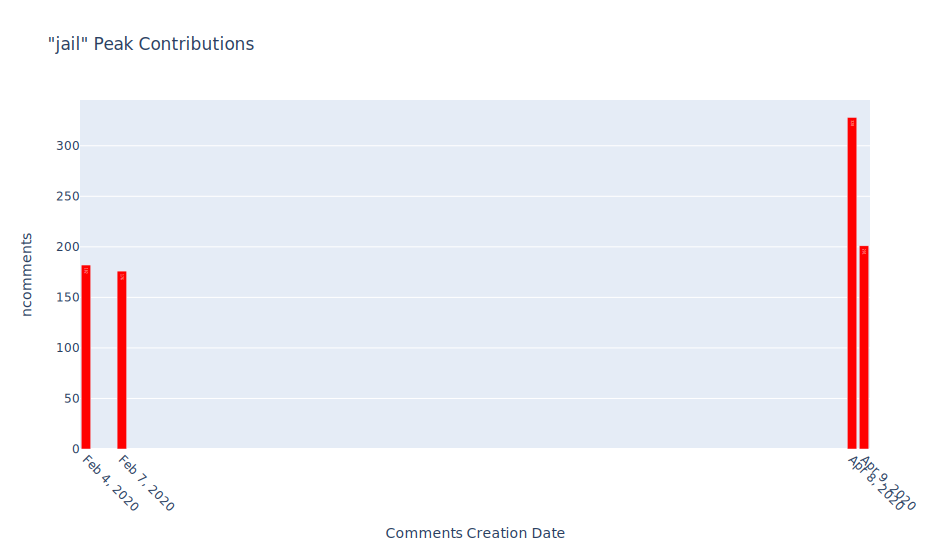

In [40]:
helpers.keyword_peaks(df_comments, 'jail', n=4, threshold=0)

In [41]:
df_jail.text.value_counts().head(60)

she should be in jail                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

<a id='spam'></a>
> ## Exploring Likely Spam Comments
> <ul>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam"><b>Likely Spam</b></a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

**Note:** These Comments are classified as likelySpam in youtube moderation_status

In [42]:
df_comments.moderation_status.value_counts()

likelySpam    2240
Name: moderation_status, dtype: int64

In [43]:
df_spam = df_comments.query(" moderation_status == 'likelySpam' ")
print(df_spam.shape)
df_spam.head()

(2240, 20)


video_id                 comment_etag            comment_id  \
15856  RZ9pdYUENBg  2ytSk1FE1AJA97Q2Madd1n98VHI  Ugh_5obtRQF8R3gCoAEC   
15874  EYo38Ffrzxk  Sf1VnkAphb--YodRkkQ1aT3moO0  Ugg8MVtx6Qxvg3gCoAEC   
16069  V07XevGKH5k  u4C1TEulypSdrp_D_ISLHILt8VI  UgjJ-c4hBX9NRngCoAEC   
16203  hFU-vcdwRMw  vKz_q216ZrAvj3G7PrhmzYYpkFA  UggZjr6ZeWNAg3gCoAEC   
16229  D24p1rQ-yo4  QufN8e7Ymk2uvxAZcCcL2zlTYn4  Uggm7RoSoQQ6YngCoAEC   

                                                    text           username  \
15856                                she is so beautiful           esvhgvtr   
15874  she kinda looks like scarlett johansson here b...        blinkatreyu   
16069              johnny is so hoooooooooootoh my godآ          Firko Depp   
16203  johny depp ruined vanessa paradis kate moss an...     Hanah Hamilton   
16229  nicolas cagein a 3d moviehe's gonna eat the au...  Shanethefilmmaker   

                   author_ch_id  nlikes                   p_dtime  \
15856  UClld9-rBfNePAy8647U2MQw     9.0 2014-01-18 04:57:12+00:00   
15874  UCJZHrLO0zTL_Udgb9CbVMww     1.0 2014-05-27 02:26:16+00:00   
16069  UCYDTxSvgndy3sJ3M6Z9cCjA    14.0 2014-01-28 11:53:37+00:00   
16203  UCidXyburWKIjXcGmwylrfDA     0.0 2014-02-26 03:00:30+00:00   
16229  UCaoGpMOT6ZkYcIElEKVoICQ     0.0 2014-01-15 18:57:09+00:00   

                        u_dtime  nreplies moderation_status comment_reply  \
15856 2014-01-18 04:57:12+00:00       1.0        likelySpam       comment   
15874 2014-05-27 02:26:16+00:00       0.0        likelySpam       comment   
16069 2014-01-28 11:53:37+00:00       1.0        likelySpam       comment   
16203 2014-02-26 03:00:30+00:00       0.0        likelySpam       comment   
16229 2014-01-15 18:57:09+00:00       0.0        likelySpam       comment   

      parent_id author_ch_url author_profile_image  year       date month  \
15856      none          none                 none  2014 2014-01-18   Jan   
15874      none          none                 none  2014 2014-05-27   May   
16069      none          none                 none  2014 2014-01-28   Jan   
16203      none          none                 none  2014 2014-02-26   Feb   
16229      none          none                 none  2014 2014-01-15   Jan   

       dayofmonth  hour  
15856          18     4  
15874          27     2  
16069          28    11  
16203          26     3  
16229          15    18

In [44]:
df_spam.username.value_counts().head(15)

Well, well, well, how the turntables    73
LaraCroftEyes1                          51
Disney Takes Huge Dix                   41
Vladimir Manosalvas IG: TheVladMan      23
k. _nf                                  21
george washington                       19
Chris Corley                            18
Muerte Anunciada                        16
BobbyDuke                               14
Josuأ© Veguilla                         14
Sam Kresil                              12
bosnis                                  12
Pommie ًںگ» Bears                       11
The Amber Heard Playlist!!              11
Andrew Flood                             9
Name: username, dtype: int64

In [45]:
df_spam.text.value_counts().head(60)

#justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<br>

<a id='pos_comments'></a>
> ## Primary Text Investigation
> <ul>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments"><b>Positive Comments</b></a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

This positive comments section is to be deducted later from the negative comments data to increase the counts accuracy

In [46]:
pos_text = {'love amber', 'stand with amber', 'standwithamber', 'support amber', 'supportamber', 'justiceforamber', 
            'johnnydeppisawifebeater', 'boycottwomenbeaters', 'wearewithamber', 'justice for amber', 
            'istandwithamber','wearewithyouamber'}

In [47]:
df_pos = df_comments[df_comments.text.str.contains('|'.join(pos_text))]
print(df_pos.shape)
df_pos.head(2)

(1982, 20)


video_id                 comment_etag                  comment_id  \
414  EYo38Ffrzxk  lszA-zsDuxsipz45LAZdRc8DYOc  UgyeKlHSK2ubb7uaQH14AaABAg   
470  yrTk-BEQ4kA  RkYh4qVNclPg1LnIAlGL8VHaEok  UgyQYAZ2Lf0islXlSsJ4AaABAg   

                                                  text           username  \
414  she is gorgeous top looking natural beauty i l...  Abdelyamine kamel   
470  nice video im glad my beautiful baby is happy ...      Lorena Correa   

                 author_ch_id  nlikes                   p_dtime  \
414  UC6UwWh45hW84f2tU8X-H3-g     0.0 2013-03-30 20:06:28+00:00   
470  UC-U0b5opsXnGRyHBzRSSLjw     0.0 2013-08-23 18:51:31+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
414 2013-03-30 20:06:28+00:00       0.0               NaN       comment   
470 2013-08-23 18:51:31+00:00       1.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
414      none          none                 none  2013 2013-03-30   Mar   
470      none          none                 none  2013 2013-08-23   Aug   

     dayofmonth  hour  
414          30    20  
470          23    18

In [48]:
df_pos.username.nunique()

1488

In [49]:
df_pos.text.value_counts().head(60)

i love amber                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [50]:
pos_users = list(df_pos.username) 

In [51]:
'Worldie - Social Media for Good' in pos_users

True

In [52]:
'Christina Taft' in pos_users

True

<br>

<a id='threat_comments'></a>
> ## Exploring Threat Comments
> <ul>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
    <li><a href="#threat_comments"><b>Threat Comments</b></a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [53]:
# KYS is an internet acronym standing for “kill yourself
threat_text = {' death', ' death ', 'burn', 'burninhell', 'burn in hell', 'kys', ' go kys', ' raped', 'get raped', 
               'go die', 'diecunt', 'go to hell', 'gotohell', 'beaten', 'beaten up', 'deserves it', 'kill amber',
               'kill her', 'deathtoamber', 'death to amber', 'to death amber', 'she’s trying to kill him',
               'kill yourself', ' deserves', 'ambich'}

In [54]:
df_threat = df_comments[df_comments.text.str.contains('|'.join(threat_text))]
print(df_threat.shape)

(26889, 20)


In [55]:
# exclude all the users with positive comments
df_threat = df_threat[~df_threat.username.isin(pos_users)]
print(df_threat.shape)
df_threat.head(2)

(25804, 20)


video_id                 comment_etag                  comment_id  \
1266  NEOT2-tgqNw  ei_6b9ETAGwxjtn2MWW8SgIHAaI  UgzHq7DvPxKkQZ26lrl4AaABAg   
1562  y9lA94P7shQ  -lUzlikm3Pax-9ehiiEHuWT_Y8Y  UgzDVoKhS57zDlWwarZ4AaABAg   

                                                   text     username  \
1266  amber is wonderful and beautiful paparazzis is...  mila cruice   
1562   imdb appears to list its production date as 2...       Nicola   

                  author_ch_id  nlikes                   p_dtime  \
1266  UCPH2JPL42MZcxeMjKJLpmvw     0.0 2013-03-15 09:30:52+00:00   
1562  UC_i3VqUyr48Fq6P-KMxKUaw     0.0 2013-10-06 02:47:31+00:00   

                       u_dtime  nreplies moderation_status comment_reply  \
1266 2013-03-15 09:30:52+00:00       0.0               NaN       comment   
1562 2013-10-06 02:47:31+00:00       0.0               NaN       comment   

     parent_id author_ch_url author_profile_image  year       date month  \
1266      none          none                 none  2013 2013-03-15   Mar   
1562      none          none                 none  2013 2013-10-06   Oct   

      dayofmonth  hour  
1266          15     9  
1562           6     2

In [56]:
df_threat.username.value_counts().head(15)

Bobby Campbell aka (The Oracle)    68
Galit Weissman                     65
Megan O'Shea                       63
Julie Lea                          60
The Amber Heard Playlist!!         58
Rob's Rules                        47
darrell holland                    45
Laura Peterson                     41
Ashely Holmes                      37
Drage_jdeppsupporter20             37
Jesus is God                       33
Rocio Pazos Martinez               31
Stevie J Raw                       31
Gilma Worldcitizen                 29
Jayne Conlon                       29
Name: username, dtype: int64

In [57]:
df_threat.text.value_counts().head(60)

go to hell                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

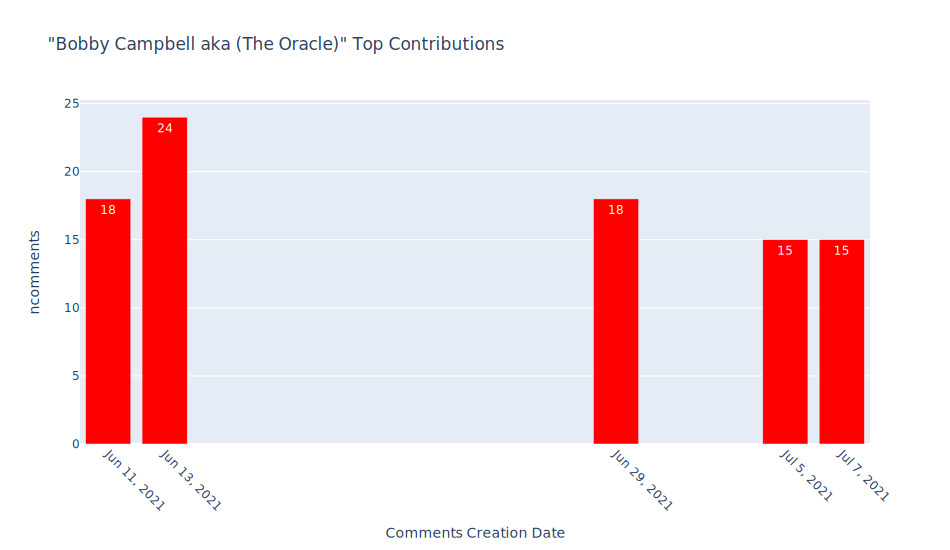

In [58]:
helpers.contr_peaks(df_comments, "Bobby Campbell aka (The Oracle)", n=5, threshold=0)

In [59]:
df_threat.query(" username == 'Bobby Campbell aka (The Oracle)' ").text.value_counts().head()

i super hate amber heard with a burning passionًںک،ًں“©ًں“¤    2
i ultra hate ah with a burning passionًںک،                     2
god i ultra hate amber heard with a burning passionًںک،        1
i hope she deserves 500000 dislikesًںک ًں‘ژًں‘ژًں“©            1
i ultra hate ah with a burning passion ًںک،                    1
Name: text, dtype: int64

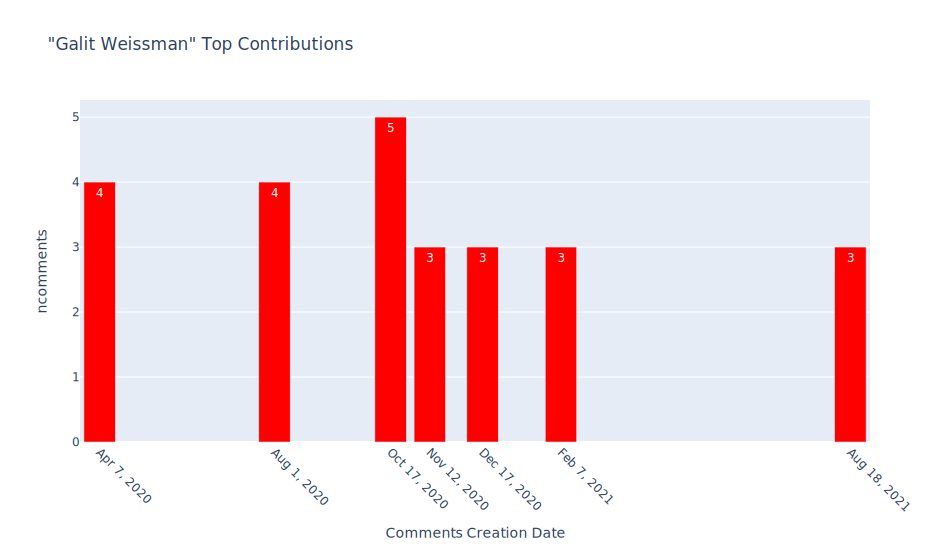

In [60]:
helpers.contr_peaks(df_comments, "Galit Weissman", n=7, threshold=0)

In [61]:
df_threat.query(" username == 'Galit Weissman' ").text.value_counts().head()

amber is a peace of trash johnny will get his justice that he deserves!!                                                                                                                                                                                                                                      2
amber and her lawyers are in panic mode so they are going to go after the lapd and disney to get something that they can use amber will stopthat nothing to get what she wants she such a selfish person karma is going to definitely catch up with her johnny is going to get the justice the he deserves    1
amber is a b**## the one she cares about is herself my heartbreake for johnny i have been a fan of johnny's since he was a 21 jump street johnny dose not deserves any of this i knew johnny will his justice amber needs to be put in jail                                                                   1
it was she dose best is lair my heartbreake for johnny and his kids i hope he gets his j

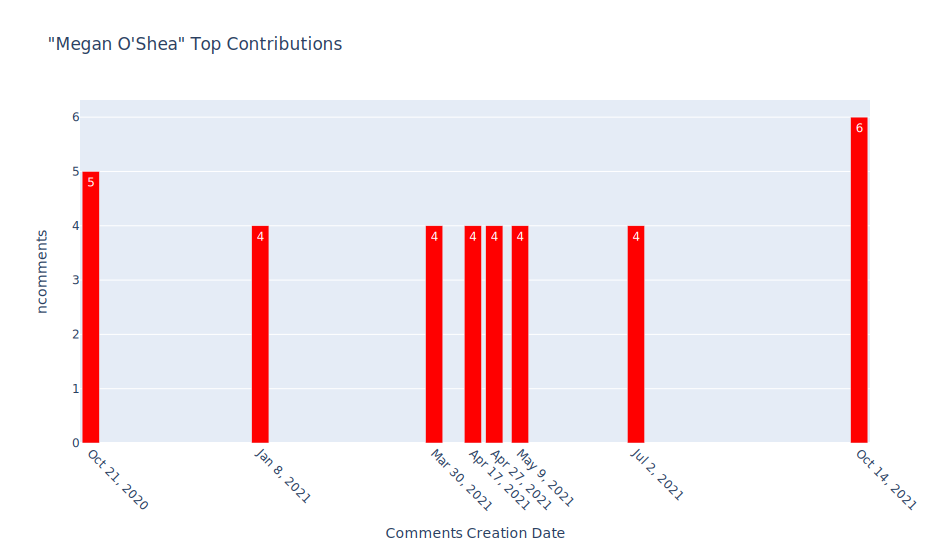

In [62]:
helpers.contr_peaks(df_comments, "Megan O'Shea", n=8, threshold=0)

In [63]:
name = "Megan O'Shea"
df_threat.query(" username == @name ").text.value_counts().head()

i really hope they get her for perjury she deserves to go to jail         3
i really hope they get ah for perjury she deserves to go to jail          2
johnny depp is getting the justice that he deserves                       1
i really hope that ah get what she got coming to she deserves jail        1
i'm so glad to hear this news justice for johnny depp that he deserves    1
Name: text, dtype: int64

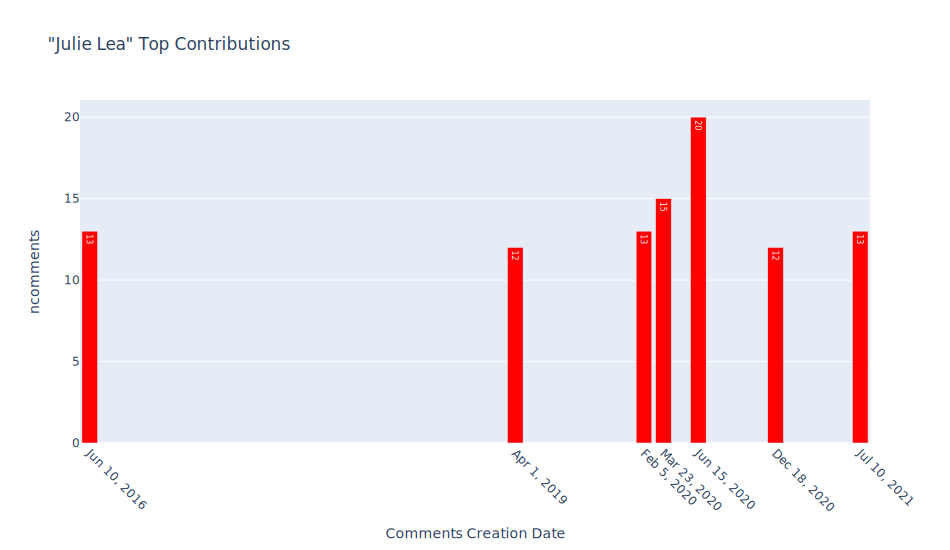

In [64]:
helpers.contr_peaks(df_comments, "Julie Lea", n=7, threshold=0)

In [65]:
df_threat.query(" username == 'Julie Lea' ").text.value_counts().head()

she cut his finger off & burned the right side of his face with a cigarette he contracted mrsa 3 times from the finger which can kill you she was enraged he asked for a post nuptial agreement this was in australia & held up filming of potc she can be seen on the red carpet bullying him refusing to let him speak to fans grabbing him etc dec in the bahama's a 3rd party witness testified heard was yelling at depp & said you'll never work againyou are career is over fat depp responded by saying get away from me & leave me alone this proves how jealous she wasthen her attorney's letter came out which basically threatened to ruin his name if he did not give her the 3 condos the car $50000 a mo spousal support & continued payment & maintenance on the above  heard's friend recently testified there were no bruises on her face the week after she claimed he hit her with a phone along with a ton of other people who saw her that week but those bruises appeared the day she went to court6 days after 

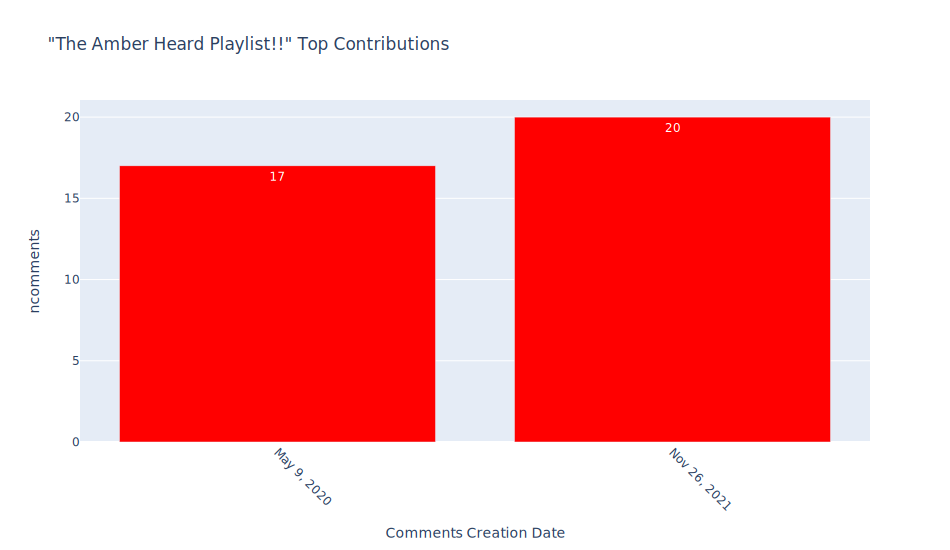

In [66]:
helpers.contr_peaks(df_comments, "The Amber Heard Playlist!!", n=2, threshold=0)

In [67]:
df_threat.query(" username == 'The Amber Heard Playlist!!' ").text.value_counts().head()

this is why you should believe amber washington postopinions amber heard: i spoke up against sexual violence ” and faced our culture's wrath that has to change by amber heard  dec 18 2018 at 3:58 pm mst amber heard is an actress and ambassador on women's rights at the american civil liberties union i was exposed to abuse at a very young age i knew certain things early on without ever having to be told i knew that men have the power ” physically socially and financially ” and that a lot of institutions support that arrangement i knew this long before i had the words to articulate it and i bet you learned it young too like many women i had been harassed and sexually assaulted by the time i was of college age but i kept quiet ” i did not expect filing complaints to bring justice and i didn't see myself as a victim then two years ago i became a public figure representing domestic abuse and i felt the full force of our culture's wrath for women who speak out friends and advisers told me i w

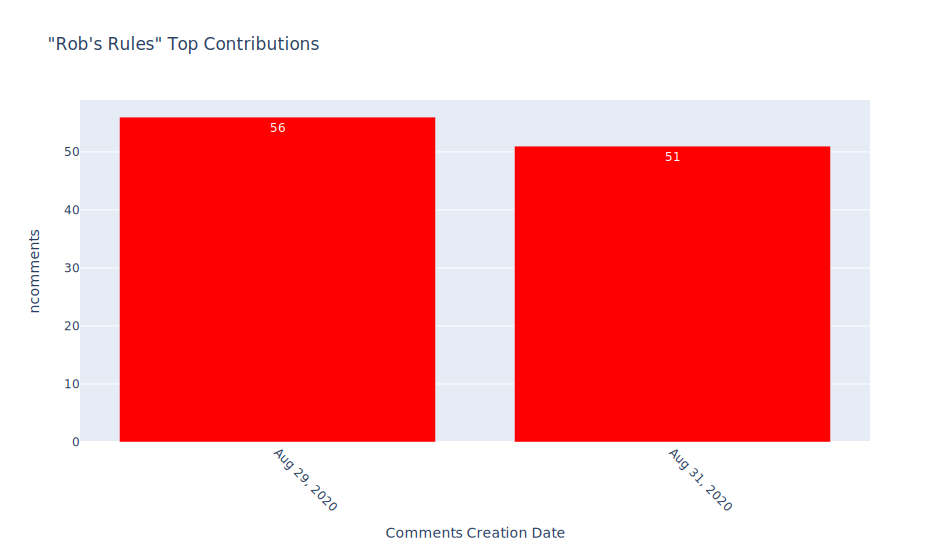

In [68]:
helpers.contr_peaks(df_comments, "Rob's Rules", n=2, threshold=0)

In [69]:
name = "Rob's Rules"
df_threat.query(" username == @name ").text.value_counts().head()

celtic iron of course i think the truth needs to be told enough is enough this poor guy suffered no need for her to treat him the way she did he deserves much better    1
i hope he gets it we all do he deserves it for all he has been through                                                                                                   1
i am hoping with march 18th around the corner johnny depp gets the retrial he deserves                                                                                   1
he deserves so much better hopefully in the future he will find it she is just evil to do all this and feel no remorse ? how does she live with herself ?                1
this was another big bomb ًں’£ to here them say fact that is what told me it is true look she deserves it for all the lies she is telling                                1
Name: text, dtype: int64

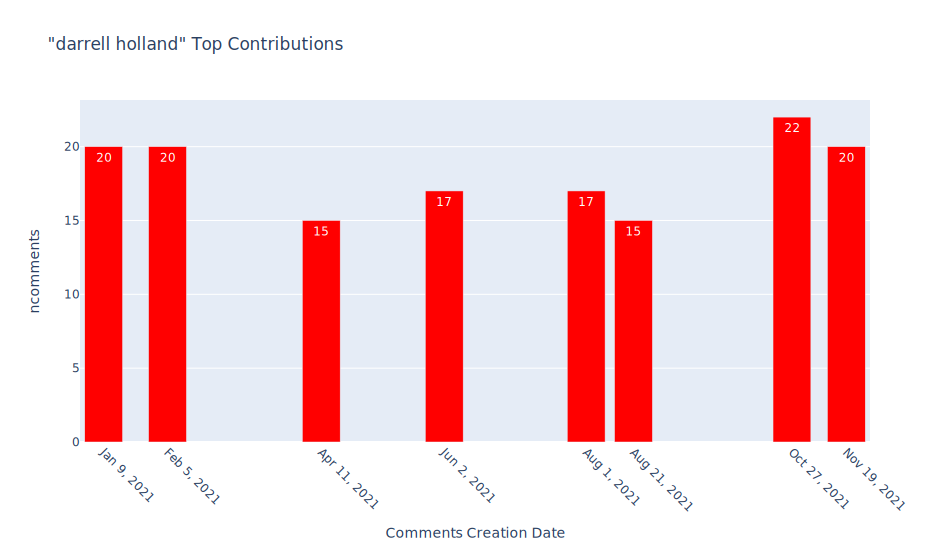

In [70]:
helpers.contr_peaks(df_comments, "darrell holland", n=8, threshold=0)

In [71]:
df_threat.query(" username == 'darrell holland' ").text.value_counts().head()

burn hollywood ًں”¥                                                                                                             3
burn disney                                                                                                                     2
burn hollywood ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥ ًں”¥    1
@the toshia poundstone show burn disney                                                                                         1
@gtshawn burn hollywood ًں”¥                                                                                                    1
Name: text, dtype: int64

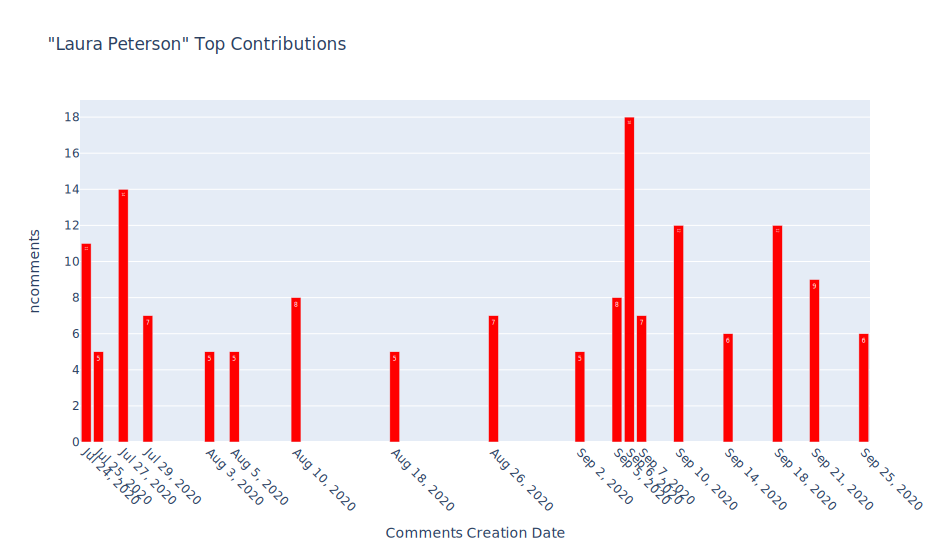

In [72]:
helpers.contr_peaks(df_comments, "Laura Peterson", n=18, threshold=0)

In [73]:
df_threat.query(" username == 'Laura Peterson' ").text.value_counts().head()

it is unbelievable that someone in his position who can have just about any woman he wants falls in love with a psycho he deserves so much better she will bring nothing but pain to anyone unfortunate enough to get involved with her man or woman                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

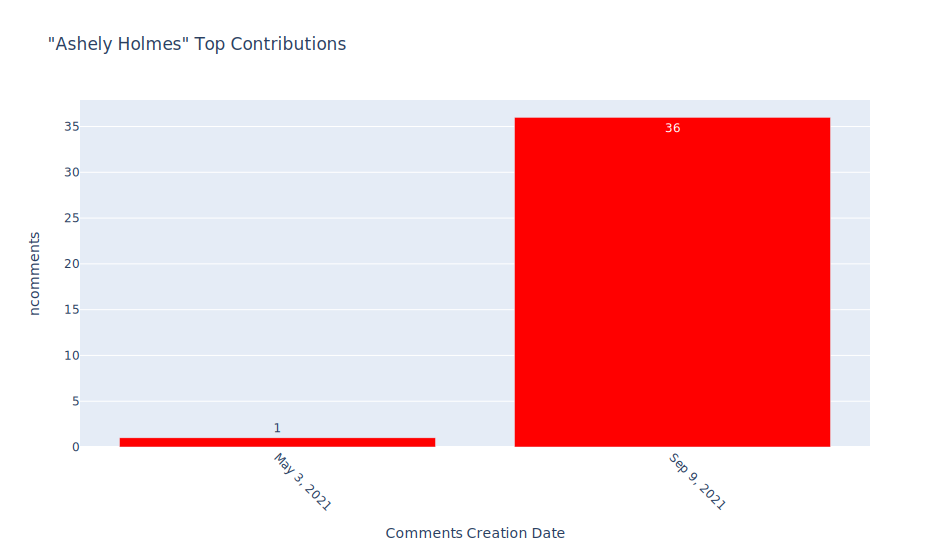

In [74]:
helpers.contr_peaks(df_comments, "Ashely Holmes", n=5, threshold=0)

In [75]:
df_threat.query(" username == 'Ashely Holmes' ").text.value_counts().head()

they have proof that she was the one being violent proof that she got makeup done to make it look like bruises proof that jd was the only one who had physical abuse and proof that jd is completely calm while she is trying to get a rise out of him because she wants to fight and he doesn't and proof that she was actively trying to ruin his career because she is a psychotic person who can't stand being dumped by a man!!! how is this still a question on who's the abuser?! how has this case not been solved? how is her career thriving while his is ending? all of his ex's came forward to tell everyone that jd was never abusive to them and always kind! how with all of this proof is she still the victim?! how has she not lost the case yet?! i'm completely baffled! this is the most ridiculous thing i've ever heard and seen! she is nothing but a complete and total psychopath who gets off on ruining the lives of anyone who dare try to get her out of their lives! she not only gets off on it but abs

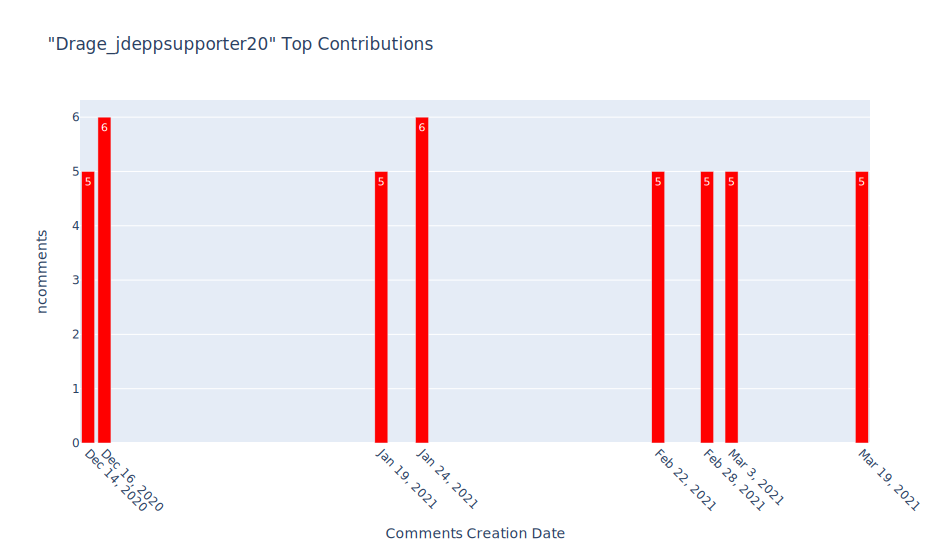

In [76]:
helpers.contr_peaks(df_comments, "Drage_jdeppsupporter20", n=8, threshold=0)

In [77]:
df_threat.query(" username == 'Drage_jdeppsupporter20' ").text.value_counts().head()

her and wb dusney deserves each other                                                                                 1
john deserves justice he deserves respect                                                                             1
johnny wont step down he deserves justice l support him they just dont want the truth to come out                     1
i purchased savauge to support johnny and dior he deserves justice peace happiness                                    1
johnny was trying to do the right thing he deserves better plus its not only johnny shes hurting its his kids too     1
Name: text, dtype: int64

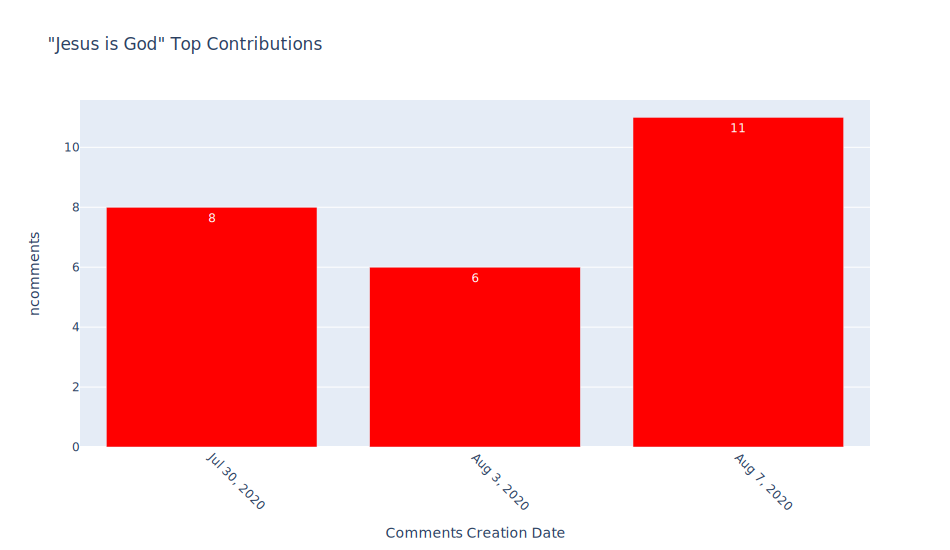

In [78]:
helpers.contr_peaks(df_comments, "Jesus is God", n=3, threshold=0)

In [79]:
df_threat.query(" username == 'Jesus is God' ").text.value_counts().head()

are you saved friend? if you died tonight will you go to heaven or hell? god almighty the creator was manifest in the flesh he came into the world to take away the sin of the world he gave up his own life to save yours his sacrifice on the cross paid the price for your redemption with his own blood on the third day he rose from dead and offers the gift of salvation and forgiveness to those that repent and trust in him this is the gospel which means the good news john 1:1 310 kjv in the beginning was the word and the word was with god and the word was god [2] the same was in the beginning with god [3] all things were made by him; and without him was not any thing made that was made [10] he was in the world and the world was made by him and the world knew him not isaiah 44:6 kjv thus saith the lord the king of israel and his redeemer the lord of hosts; i am the first and i am the last; and beside me there is no god revelation 1:17 18 kjv and when i saw him i fell at his feet as dead and 

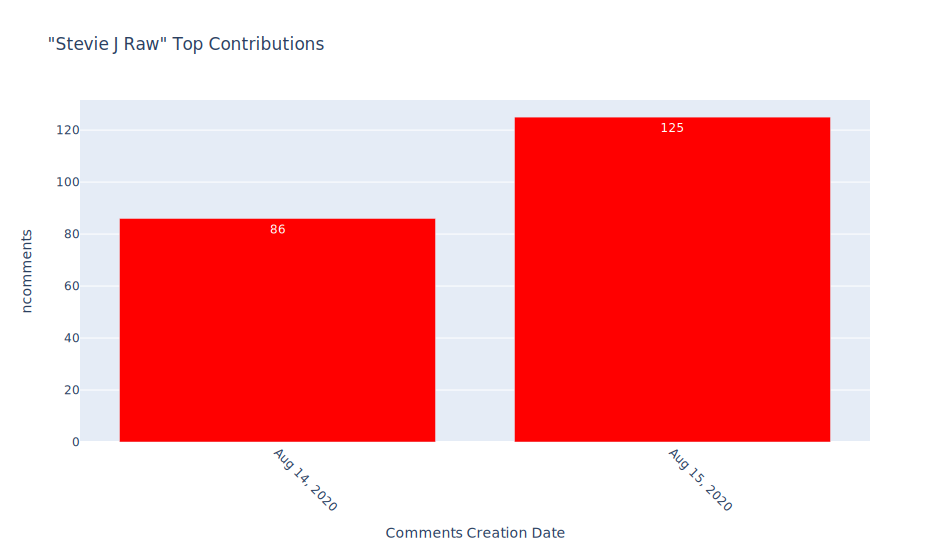

In [80]:
helpers.contr_peaks(df_comments, "Stevie J Raw", n=2, threshold=0)

In [81]:
df_threat.query(" username == 'Stevie J Raw' ").text.value_counts().head()

agreed she deserves to be locked up                                                                                                                                                                    1
couldn't agree more he deserves that at a minimum                                                                                                                                                      1
thanks ًں™ڈ and no problem at all i'm glad i could share this awesome closing argument he really nailed it! i agree that johnny now deserves to win the case and the sun should be held accountable    1
agree johnny deserves justice ًں‘چ                                                                                                                                                                     1
right 99% of the comments i get are supporting johnny which is great to see he deserves justice and although he's not perfect he's no wife beater                                                   

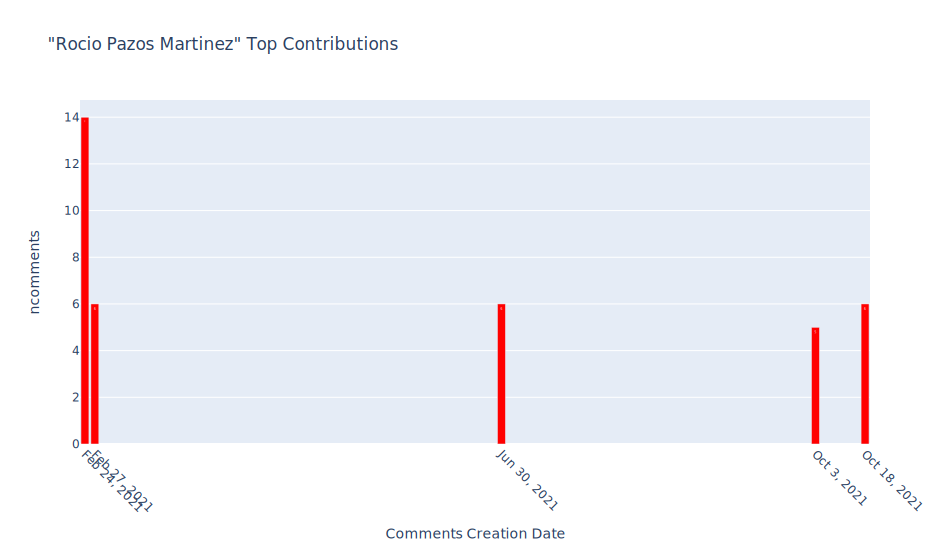

In [82]:
helpers.contr_peaks(df_comments, "Rocio Pazos Martinez", n=5, threshold=0)

In [83]:
df_threat.query(" username == 'Rocio Pazos Martinez' ").text.value_counts().head()

she deserves what is coming in her way                                                                                                                          1
fingers crossed that it will be justice and she will finish in jail she deserves it                                                                             1
ًںک‚ًںک‚ًںک‚ so happy karma is coming for her she deserves it                                                                                                   1
karma charging at 50% she deserves all that is coming in here life                                                                                              1
she is an abuser and a liar she ruined jd he lost character in movies for she be more rich sorry but ah deserves be fired and stay in jail for lied in court    1
Name: text, dtype: int64

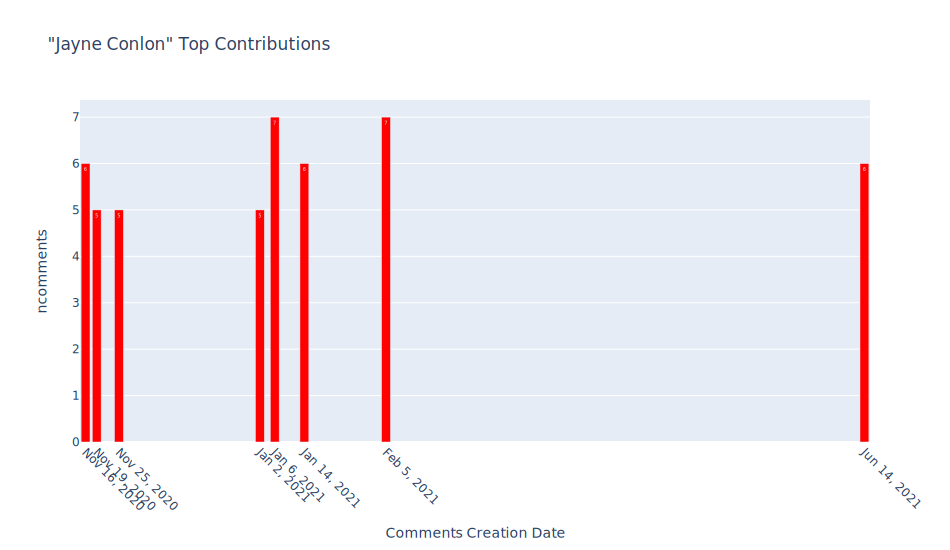

In [84]:
helpers.contr_peaks(df_comments, "Jayne Conlon", n=8, threshold=0)

In [85]:
df_threat.query(" username == 'Jayne Conlon' ").text.value_counts().head()

at least johnny is know for being a generous kind human being all anger turd is known for is being an abusive narcissistic lying thieving cheating scum bag that can't act she'll get whats coming to and johnny will get the justice he so deserves                                                                                  1
this is fantastic news i'm proper cheered up now justice at last jd really deserves it i hope she gets what's coming to her lock her up so she can't hurt anyone else i only hope they have the balls to issue apologies to jd he's been through hell justice for johnny depp ًں‘چًں‘چًں‘چًں‘چًں‘چًںکƒًںکƒًںکƒًںکƒًںکƒًںکƒًںکƒًںکƒ    1
best news ever anger turd gets what she deserves and johnny gets the justice he deserves ًں‘ڈ â‌¤ ًں™œ                                                                                                                                                                                                                                1
this nrws has ma

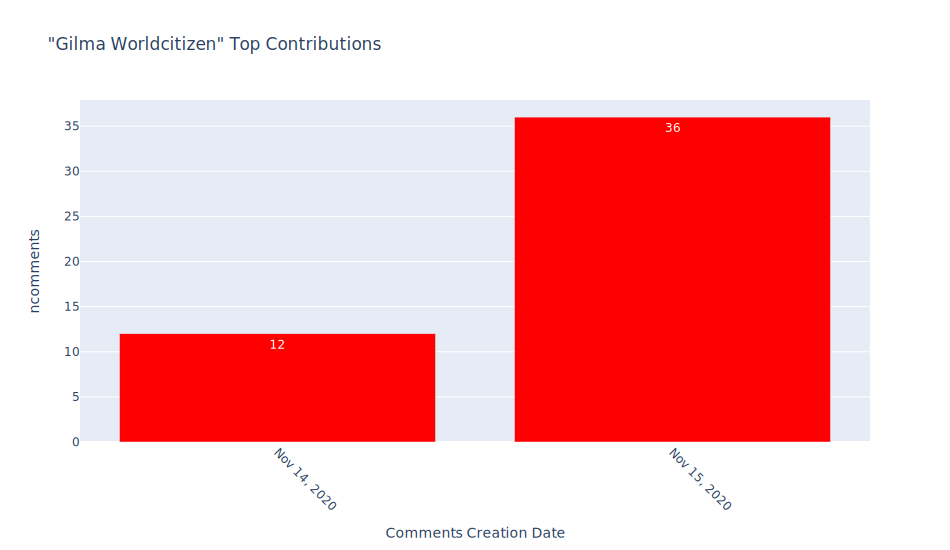

In [86]:
helpers.contr_peaks(df_comments, "Gilma Worldcitizen", n=2, threshold=0)

In [87]:
df_threat.query(" username == 'Gilma Worldcitizen' ").text.value_counts().head()

this case is going to be exemple for all men who suffer for abuse women we have to fight for men rights against domestic violence we are losing the freedom of communication!!! hope his team will be loyal until the end as rupert murdoch the owner of sun talkradio and many other newspapers and media companies he is a very influential and powerful man in europe maybe in america is well his position put him a predator and nowadays people do anything even kill their own family for money it is published by the news group newspapers division of news uk itself a wholly owned subsidiary of rupert murdoch's news corp since the sun on sunday was launched in february 2012 the paper has been a seven day operation judge andrew nicol's son robert palmer works @ talkradio uk talkradio employs dan wooton who wrote the article jonny deep sued for libel (sun and talkradio belong to rupert murdoch's news corp) judge andrew nicol controversial cases innocent judget guilty and after many years innocented by

<br>

<a id='neg_comments'></a>
> ## Exploring Negative Comments
> <ul>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments"><b>Negative Comments</b></a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

<a id='negative_comments'></a>
>> ## Negative Comments
> <ul>
    <li><a href="#negative_comments"><b>Negative Comments</b></a></li>
 <li><a href="#victim">Contains "Victim"</a></li>
 <li><a href="#no_victim">Negative Comments Without "Victim"</a></li>
 </ul>

In [88]:
# To Load the dictionary of negative text    
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f) 
    neg_text = set(neg_dict.keys())

In [89]:
neg_text = neg_text | threat_text

In [90]:
neg_text = neg_text | {'narcissist', 'cancelamber', 'cancel amber', 'amber sucks', 'hate amber heard', 'scamber', 
                       'boycott amber', 'amber heard sucks', "i remind that amber heard craped on jonny depp's bed",
                       'amber heard is trash', 'deleteamber', 'delete amber', 'amber heard is a monster'}

In [91]:
neg_text

{' death',
 ' death ',
 ' deserves',
 ' go kys',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber heard is a monster',
 'amber heard is trash',
 'amber heard sucks',
 'amber lunge',
 'amber sucks',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'ambich',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycott amber',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'cancel amber',
 'cancelamber',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'delete amber',
 'deleteamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violen

# Negative Comments

In [92]:
df_neg_total = df_comments[df_comments.text.str.contains('|'.join(neg_text))]
print(df_neg_total.shape)

(394697, 20)


In [93]:
# exclude all the users with positive comments
df_neg_total = df_neg_total[~df_neg_total.username.isin(pos_users)]
print(df_neg_total.shape)
df_neg_total.head(2)

(381226, 20)


video_id                 comment_etag                  comment_id  \
39   VPUUrdgxIa8  N0IcnfXWAATmNc7PATmVsXq5-58  UgycOQe20TUYIOyB5zR4AaABAg   
120  VPUUrdgxIa8  qorqkViON0Ig3VMl0EmlAvX5H3E  UgztIGiBkAiBgyO03rR4AaABAg   

                                                  text            username  \
39   whoa hold on there buddy are you saying that p...  lowdownshakinchill   
120  it was part of an idiotic series of comments w...               jsssm   

                 author_ch_id  nlikes                   p_dtime  \
39   UCCOdIP_feMgW00kp1fiE8fg     0.0 2013-09-01 18:55:13+00:00   
120  UCv0UUMS3TZgn68PnWDWAVpw     0.0 2013-08-15 22:56:15+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
39  2013-09-01 18:55:13+00:00       0.0               NaN       comment   
120 2013-08-15 22:56:15+00:00       0.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
39       none          none                 none  2013 2013-09-01   Sep   
120      none          none                 none  2013 2013-08-15   Aug   

     dayofmonth  hour  
39            1    18  
120          15    22

In [94]:
users_negative_set = set(df_neg_total.username) - {np.nan}
len(users_negative_set)

227750

In [95]:
neg_users = neg_users | users_negative_set

In [96]:
df_neg_total.text.value_counts().head(60)

they won't believe you because you are a man she is not a victim                                                                               43276
they won't believe you because you are a man amber heard she is not a victim                                                                    1595
they won't believe you because you are a man she is not the victim                                                                              1331
she is not a victim                                                                                                                             1109
they wont believe you because you are a man she is not a victim                                                                                 1019
they won't believe you because your a man she is not a victim                                                                                   1010
they won't believe you because you are a man she is not a victim!                                         

### Likely-Spam Negative Comments

In [97]:
df_neg_total.moderation_status.value_counts()

likelySpam    405
Name: moderation_status, dtype: int64

In [98]:
df_neg_spam = df_neg_total.query(" moderation_status == 'likelySpam' ")
print(df_neg_spam.shape)
df_neg_spam.head(2)

(405, 20)


video_id                 comment_etag            comment_id  \
34335  NRlp5njBZyw  lN_sY5UexLfnmvfeCGUwWJ-yGCc  UghRoax9kwxbA3gCoAEC   
79489  Y4Xh2KBI4I0  dTzx5tbiBn6_QIvdti-xAe7bKIo  UghfIXDT_Ut1C3gCoAEC   

                                                    text     username  \
34335  mr4:3 and 1440p strike again getting real tire...   PaperManga   
79489                these are some god acting skills!!!  id104335409   

                   author_ch_id  nlikes                   p_dtime  \
34335  UCZOawtPKJPig3HfwGWVzeRw     0.0 2014-02-23 11:50:01+00:00   
79489  UCptxRTUw5NZx7gtrIlbYZYw     1.0 2016-04-18 09:46:24+00:00   

                        u_dtime  nreplies moderation_status comment_reply  \
34335 2014-02-23 11:50:01+00:00       0.0        likelySpam       comment   
79489 2016-04-18 09:46:24+00:00       0.0        likelySpam       comment   

      parent_id author_ch_url author_profile_image  year       date month  \
34335      none          none                 none  2014 2014-02-23   Feb   
79489      none          none                 none  2016 2016-04-18   Apr   

       dayofmonth  hour  
34335          23    11  
79489          18     9

In [99]:
df_neg_spam.text.value_counts().head(60)

please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [100]:
df_nneg_spam = df_neg_spam.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nneg_spam.shape)
df_nneg_spam = df_nneg_spam.sort_values('ncomments', ascending=False)
df_nneg_spam.head(15)


(241, 4)


username  ncomments  nreplies  nlikes
189  Well, well, well, how the turntables         44       0.0     7.0
188    Vladimir Manosalvas IG: TheVladMan         23       0.0    27.0
202                                bosnis         12       0.0     6.0
212                     george washington         10       1.0     2.0
173            The Amber Heard Playlist!!          9       0.0     1.0
26                              BobbyDuke          8       0.0    11.0
115                         London Pastel          8       0.0     9.0
146                     Pommie ًںگ» Bears          5       0.0    29.0
226                          mashermancan          5       0.0     1.0
147               Portal Distant Kingdoms          5       0.0     6.0
205                        chantall meyer          4       0.0     2.0
65                              Finnilebo          4       0.0     1.0
42                          Connie Savage          4       0.0     0.0
107                    LidiaBellaItaliana          4       1.0     2.0
223                                k. _nf          3       0.0    47.0

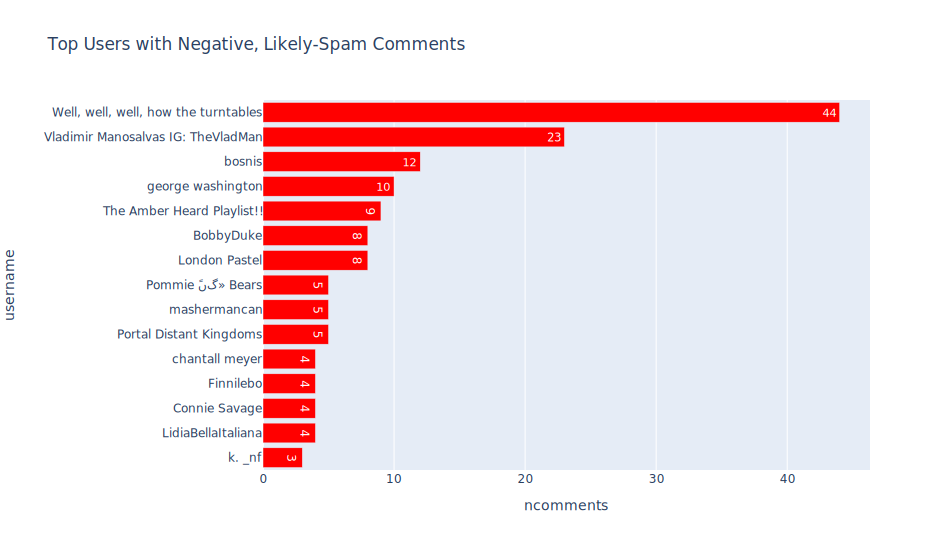

In [101]:
helpers.barh(df_nneg_spam.head(15), 
             'Top Users with Negative, Likely-Spam Comments', threshold=0)

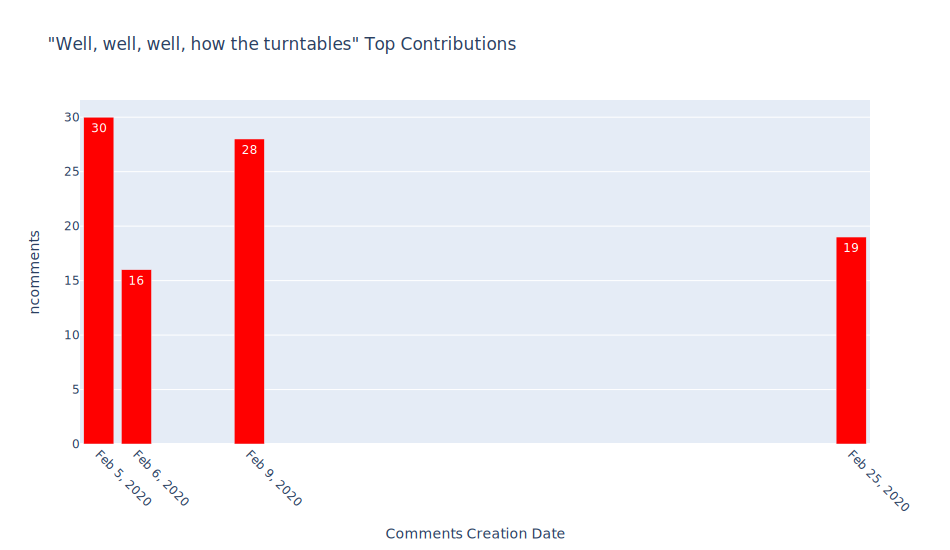

In [102]:
helpers.contr_peaks(df_comments, "Well, well, well, how the turntables", n=4, threshold=0)

In [103]:
df_neg_spam.query(" username == 'Well, well, well, how the turntables' ").text.value_counts().head()

petition to remove amber heard from the next aquaman film http://chngit/jxvlthb9pd 2nd petition to revoke her title of ambassador of womens rights http://chngit/hpfgcc8t7f                                                                   15
http://chngit/6mkpvp5krm sign petition to remove amber turd from aquaman 2 http://chngit/ylgjqz2zdn 2nd petition to remove amber turd from loreal http://chngit/skt9pvzvsq 3rd petition to remove her title of ambassador of womens rights     8
http://chngit/9zdwzmfwjk petition link                                                                                                                                                                                                         7
petition to remove amber heard from aquaman 2 http://chngit/6mkpvp5krm  2nd petition to revoke her title of ambassador of womens rights http://chngit/tj9zqwts9c                                                                               3
http://chngit/wtcnfq8zms heres petit

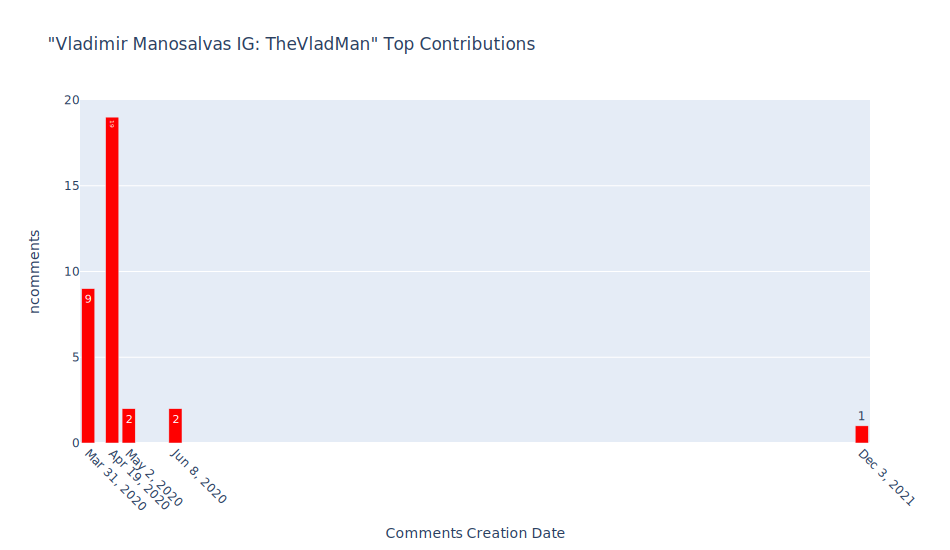

In [104]:
helpers.contr_peaks(df_comments, "Vladimir Manosalvas IG: TheVladMan", n=5, threshold=0)

In [105]:
df_neg_spam.query(" username == 'Vladimir Manosalvas IG: TheVladMan' ").text.value_counts().head()

please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8                   19
please sign this petition to remove amber heard from aquaman 2 https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                                                         1
janna mcintosh please sign this petition to remove abuser heard from aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm_0paltjuyh8     1
please sign this petition to remove amber heard in aquaman 2 over 400000 signatures so far! https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2?fbclid=iwar2kn9zpj azwunc96oivouhbytonesxogxv2wlytirfkghm

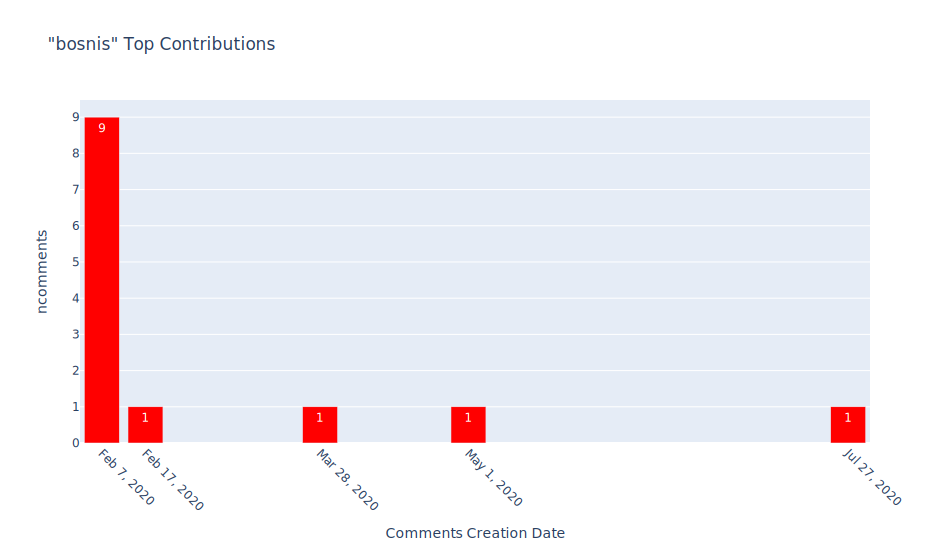

In [106]:
helpers.contr_peaks(df_comments, "bosnis", n=5, threshold=0)

In [107]:
df_neg_spam.query(" username == 'bosnis' ").text.value_counts().head()

please sign the petition to remove amber heard from aquaman 2: http://chngit/4rmtchbtjs    12
Name: text, dtype: int64

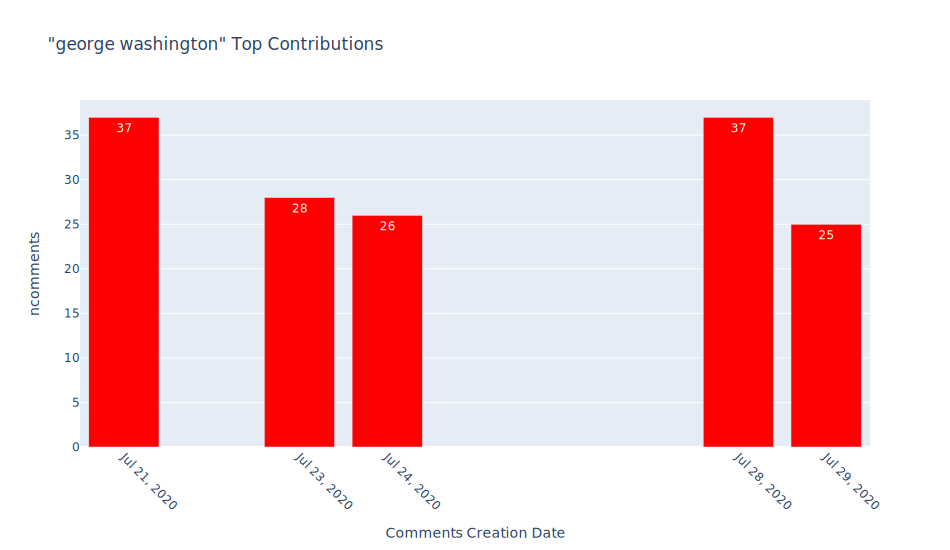

In [108]:
helpers.contr_peaks(df_comments, "george washington", n=5, threshold=0)

In [109]:
df_neg_spam.query(" username == 'george washington' ").text.value_counts().head()

details on amber heard's domestic abuse arrest revealed https://wwwyoutubecom/watch?v=81mnraxlbee as many of you might know by now amber heard has a reported history of domestic violence including a time when she was arrested for allegedly assaulting her ex wife tasya van ree at seattle tacoma international airport in 2009 now the details of the incident are finally getting attention in the media    2
usa lawsuit starts january 21 2021 fairfax virginia johnny depp suing ex wife amber heard in virginia                                                                                                                                                                                                                                                                                                              1
narcissist abuser amber heard a therapist's thoughts on johnny and amber's audio argument! https://wwwyoutubecom/watch?v=bvuiaokqaq0                                                          

### A Heat Map for the Negative Comments 


Note: The Peaks on Feb, Dec 2020



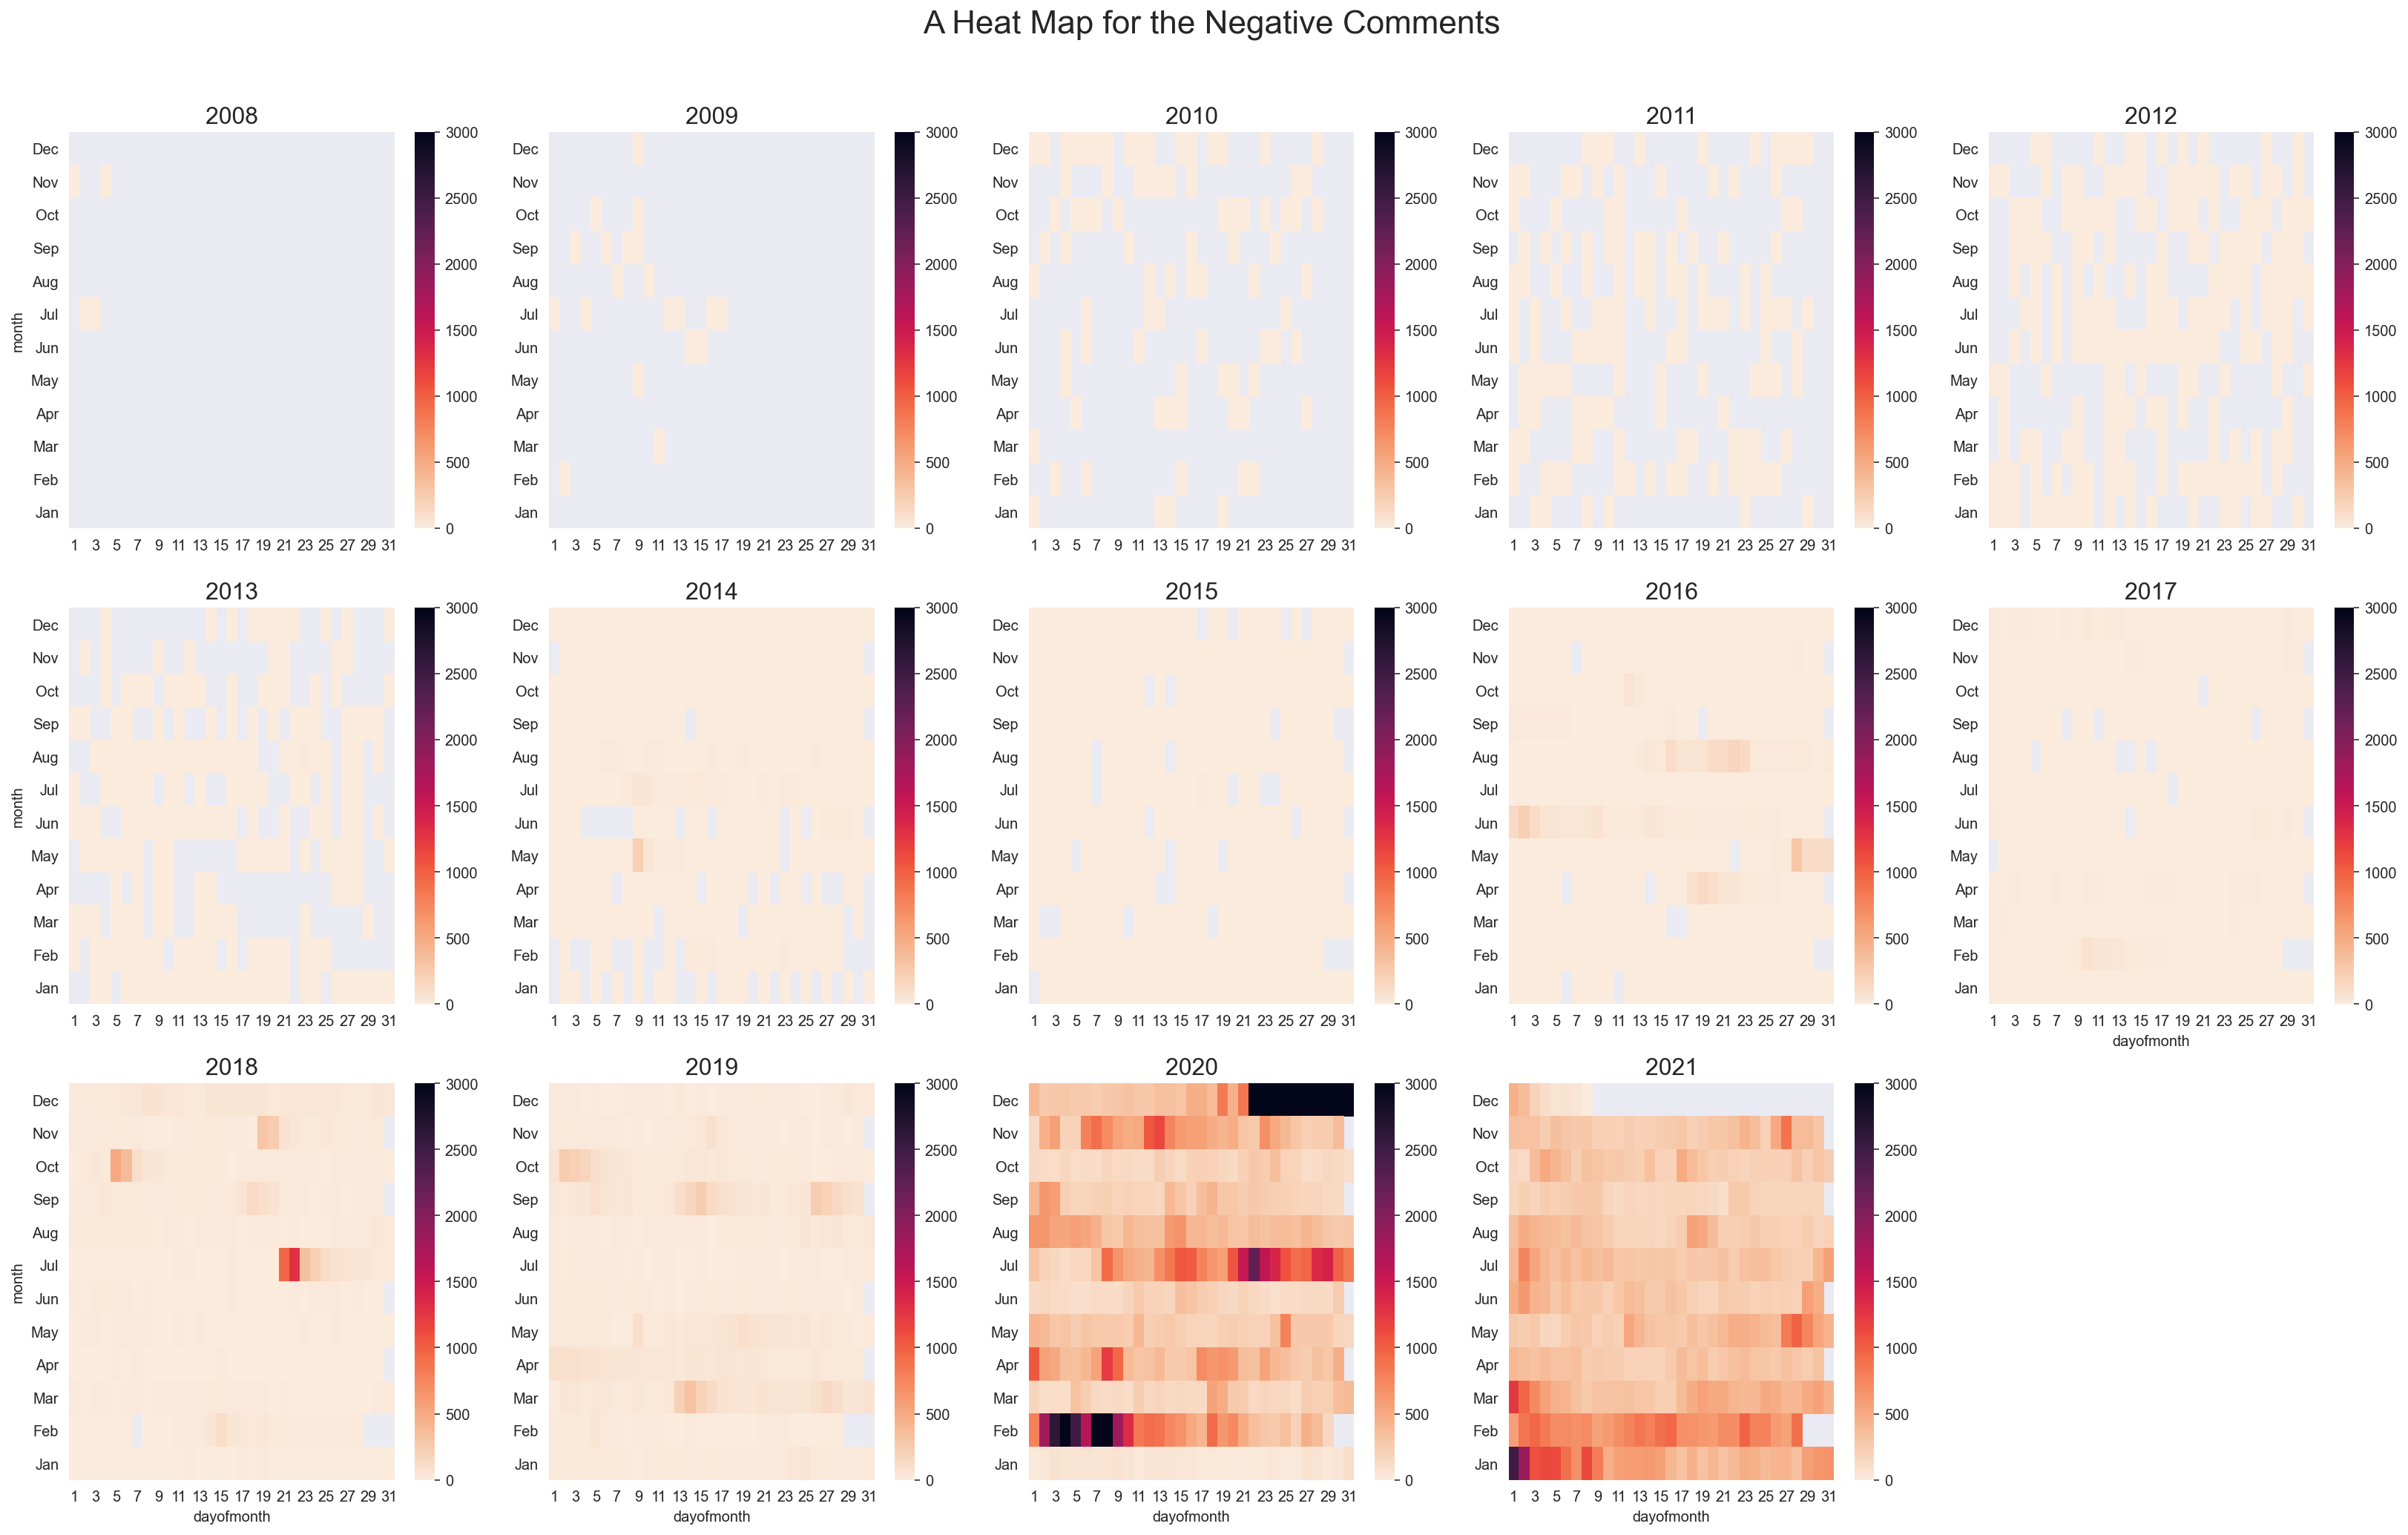

In [110]:
neg_daily = df_neg_total.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Negative Comments'
helpers.facet_heat(neg_daily, title, n_col=5, vmax=3000)

### Top Users with Negative Comments (Only Negative Contributions)

In [111]:
df_nneg = df_neg_total.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nneg.shape)
df_nneg = df_nneg.sort_values('ncomments', ascending=False)
df_nneg.head(15)

(227750, 4)


username  ncomments  nreplies  nlikes
88313                              Julie Lea        449     184.0  3032.0
102840                          Lindsey Depp        424      34.0   700.0
38347                              Crispy Co        293      90.0  1855.0
24323        Bobby Campbell aka (The Oracle)        282     188.0  3504.0
34597                        Christine Lloyd        268      40.0  1178.0
145447                           Rob's Rules        263       4.0   374.0
181678  Well, well, well, how the turntables        243      49.0  1201.0
104840                          Lorri Holder        230      79.0  1608.0
166513                       Tania Haeussler        219      73.0  1447.0
162718                          Stevie J Raw        215      59.0   900.0
30153                          Carmen Castro        200      51.0  1261.0
169326                      The Killing Joke        199      61.0   596.0
182371           Wild Heart's Can't Be Tamed        195     131.0  1161.0
80136                        Jay A Errington        191     133.0  1219.0
168632            The Amber Heard Playlist!!        190      53.0    15.0

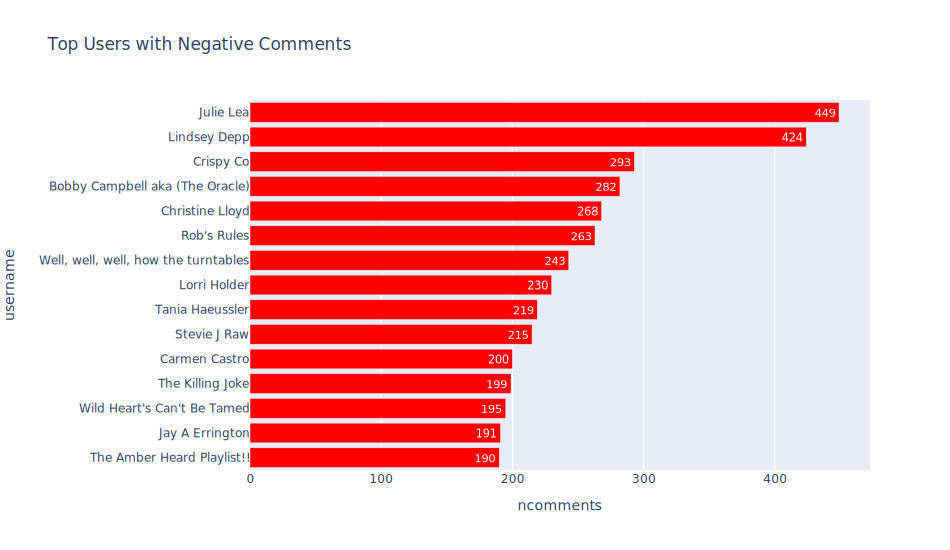

In [112]:
helpers.barh(df_nneg[['username', 'ncomments']].head(15), 'Top Users with Negative Comments', threshold=0)

### Negative Users Contributions on Each Date

In [113]:
df_n = df_neg_total.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_n.head(15)


date                             username  ncomments  nlikes  \
209462 2020-12-29                             Damn ...         62    17.0   
229820 2021-01-08                      Kilim Nataniahu         62   105.0   
156745 2020-12-22                             Goth Kid         60     0.0   
176992 2020-12-25                        Frost_Daghers         43    10.0   
21599  2019-02-05                                Lotta         41    10.0   
222952 2021-01-01                        aria tatality         40     0.0   
117963 2020-08-12                      Bernie McKinley         39    20.0   
205246 2020-12-28                            Ov3r tube         38   210.0   
291649 2021-06-06                         Willy Gonutz         38    10.0   
225013 2021-01-02  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         36    27.0   
291561 2021-06-06                        Marianne Erni         36    40.0   
316165 2021-09-09                        Ashely Holmes         36    35.0   
207837 2020-12-28                            you good?         35    12.0   
174425 2020-12-24                           Zhong Xina         35  1582.0   
212279 2020-12-29             Sweet Succulent Euphoria         35   981.0   

        nreplies  
209462       0.0  
229820       1.0  
156745       0.0  
176992       0.0  
21599        0.0  
222952       1.0  
117963       0.0  
205246       0.0  
291649       1.0  
225013       2.0  
291561       0.0  
316165       9.0  
207837       0.0  
174425       0.0  
212279       0.0

### Negative Comments Peak Dates

In [114]:
negative_dates = df_neg_total.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

negative_dates.head(15)

date  ncomments    nlikes  nreplies
3093 2020-12-27      12837  175308.0     769.0
3092 2020-12-26       9639  169265.0     557.0
3089 2020-12-23       9553  240048.0    1376.0
3090 2020-12-24       8423  234557.0     941.0
3094 2020-12-28       7951   94882.0     624.0
3095 2020-12-29       6144   92072.0     709.0
3096 2020-12-30       4801   80637.0     434.0
3091 2020-12-25       4409   90777.0     452.0
2766 2020-02-04       4347  121480.0    3223.0
3088 2020-12-22       3744  117748.0     780.0
2769 2020-02-07       3329   92380.0    2592.0
2770 2020-02-08       3062  107037.0    1964.0
3097 2020-12-31       2965   47417.0     448.0
2765 2020-02-03       2635  114041.0    2939.0
3098 2021-01-01       2495   37574.0     334.0

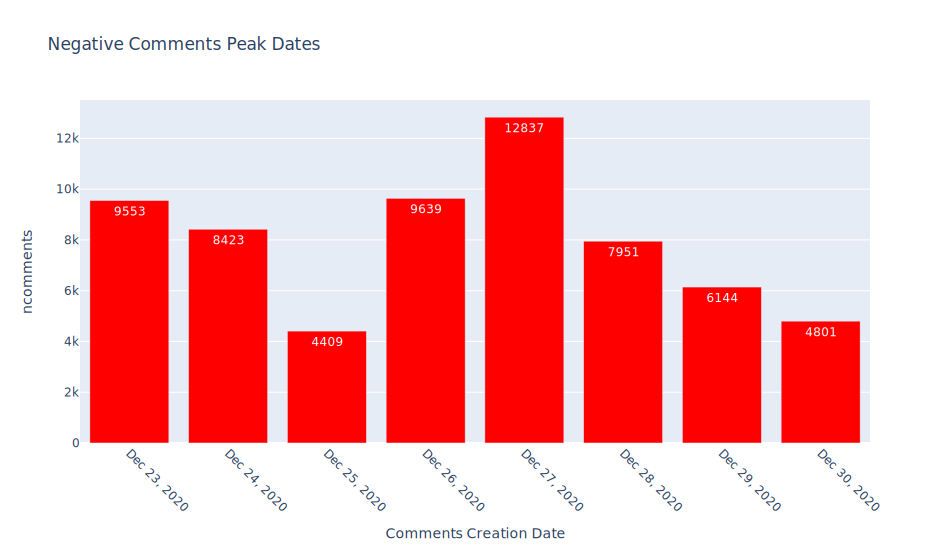

In [115]:
helpers.bar_peaks(negative_dates[['date', 'ncomments']].head(8), 
                  'Negative Comments Peak Dates')

### More Investigations on Top Users Commented Negatively

In [116]:
df_n.username.head(15)

209462                               Damn ...
229820                        Kilim Nataniahu
156745                               Goth Kid
176992                          Frost_Daghers
21599                                   Lotta
222952                          aria tatality
117963                        Bernie McKinley
205246                              Ov3r tube
291649                           Willy Gonutz
225013    ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x
291561                          Marianne Erni
316165                          Ashely Holmes
207837                              you good?
174425                             Zhong Xina
212279               Sweet Succulent Euphoria
Name: username, dtype: object

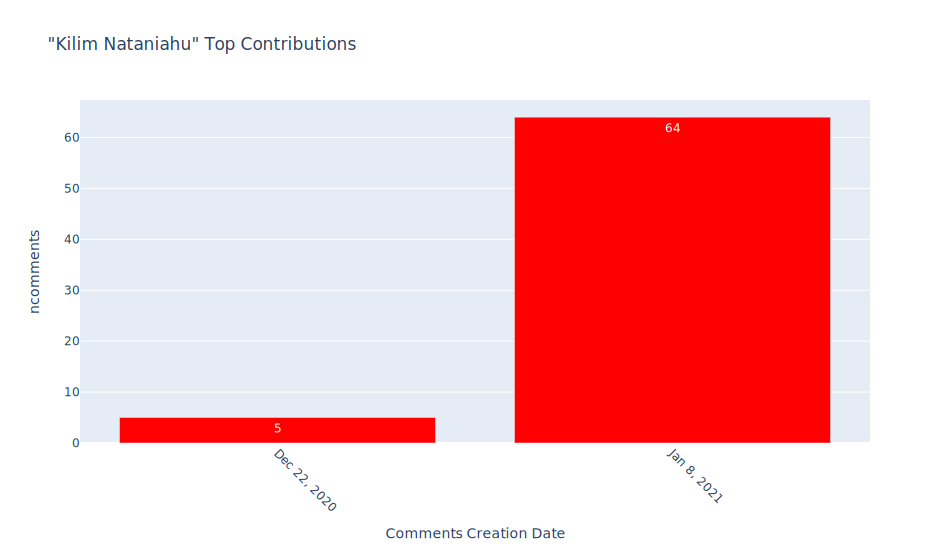

In [117]:
helpers.contr_peaks(df_comments, "Kilim Nataniahu", n=5, threshold=0)

In [118]:
df_comments[df_comments.username == 'Kilim Nataniahu'].text.value_counts().head(60)

to all people here star downvoting all access videos they are clearly taking the side of a domestic abuser we should not tolerated domestic abuse in any shape or form make this know too in their twitter feed do not let them profit from the defence of domestic abusers !!!!!                                      28
to all people here star downvoting all access videos they are clearly taking the side of a domestic abuser we should not tolerated domestic abuse in any shape or form make this know too in their twitter feed do not let them profit from the defence of domestic abusers !!!!                                       23
nobody will believe you because you are a man amber heard                                                                                                                                                                                                                                                               5
i will be downvoting all your videos because you are givin

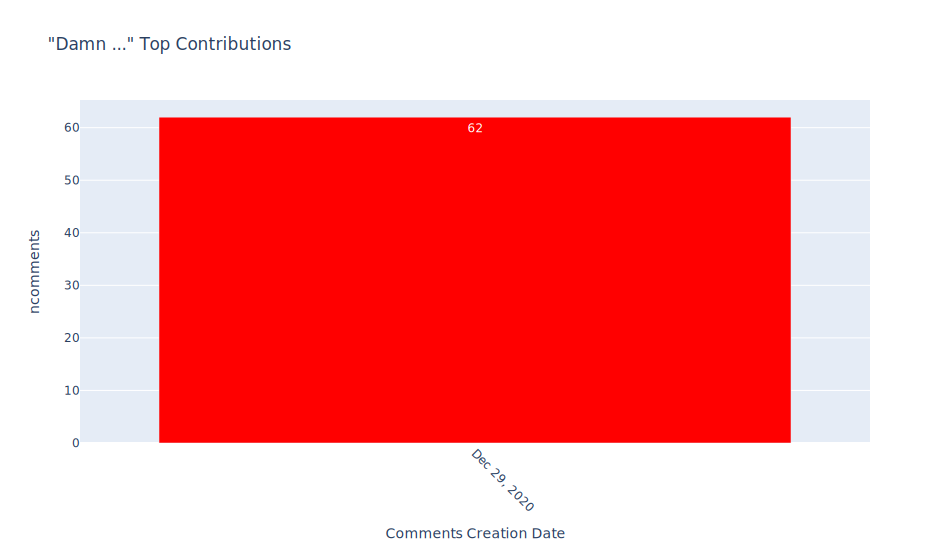

In [119]:
helpers.contr_peaks(df_comments, "Damn ...", n=5, threshold=0)

In [120]:
df_comments[df_comments.username == 'Damn ...'].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    62
Name: text, dtype: int64

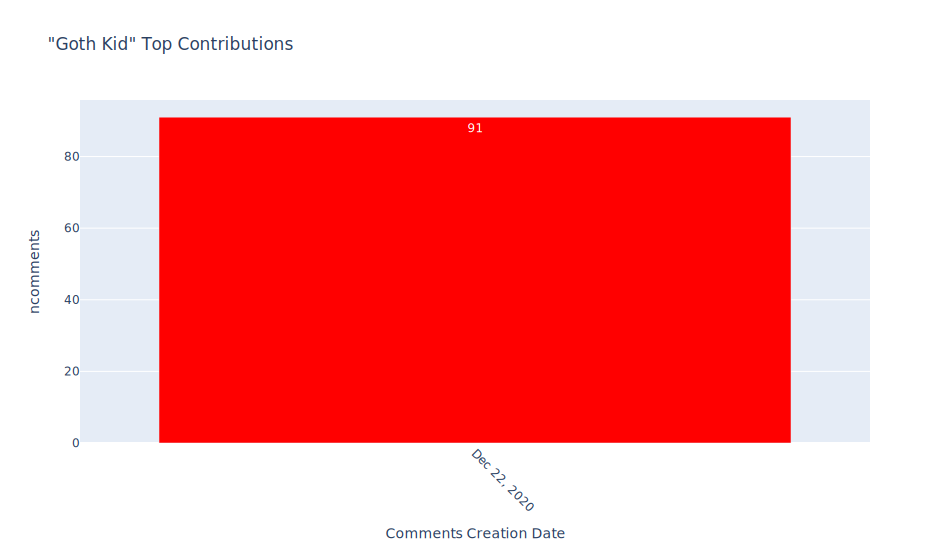

In [121]:
helpers.contr_peaks(df_comments, "Goth Kid", n=5, threshold=0)

In [122]:
df_comments[df_comments.username == 'Goth Kid'].text.value_counts().head(60)

#justiceforjohnny #youtubesupportsabusers    38
#justiceforjohnny                            31
#youtubesupportsabusers                      22
Name: text, dtype: int64

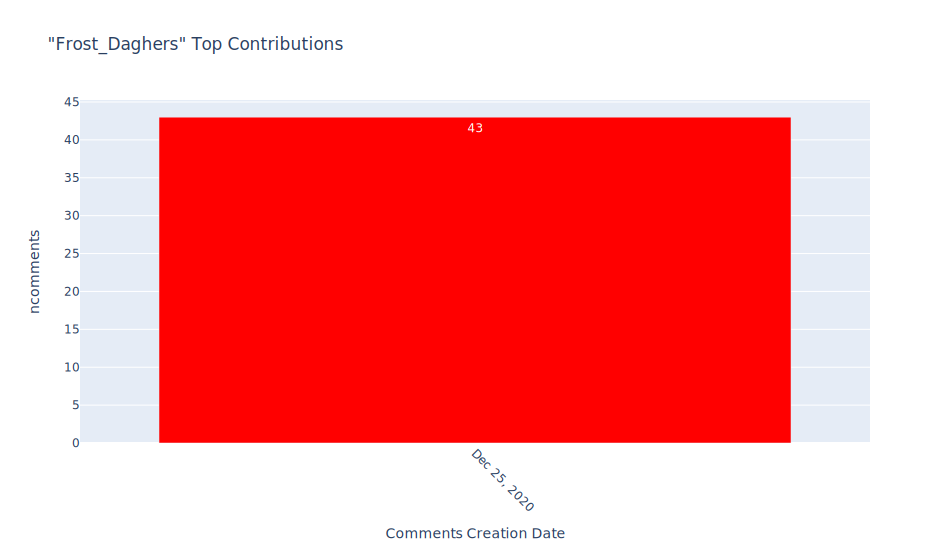

In [123]:
helpers.contr_peaks(df_comments, "Frost_Daghers", n=5, threshold=0)

In [124]:
df_comments[df_comments.username == 'Frost_Daghers'].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    43
Name: text, dtype: int64

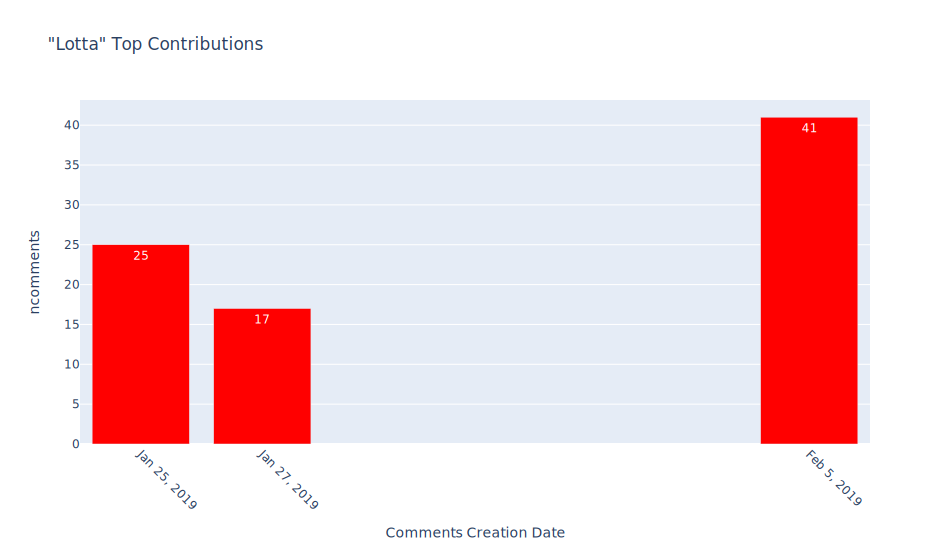

In [125]:
helpers.contr_peaks(df_comments, "Lotta", n=3, threshold=0)

In [126]:
df_comments[df_comments.username == 'Lotta'].text.value_counts().head(60)

slim fill the allegations of him throwing iphone at her were fake you should do your research before you doom a good innocent person there were shitton of evidence proving she was lying: she herself was arrested for domestig violence and she even had to go to court because of it 1 she first asked for divorce and 50k month suppousal support (even when they did not have kids and were marrued 13 months) she also asked for all the cars houses and the dogs 2 when she got denied she made the allegations (btw she asked for divorce day later his mother died) her only edivence was pictures of her bruises that you could easily do with makeup or just drop a phone to your face their housekeeper said she saw amber without makeup next day and without bruise the fucking police filed a report saying there were no sign of violence whatsoever (they were called when they were fighting but left after amber asked and saw no sign of any violence) their bodyquards who were there when it was happening said th

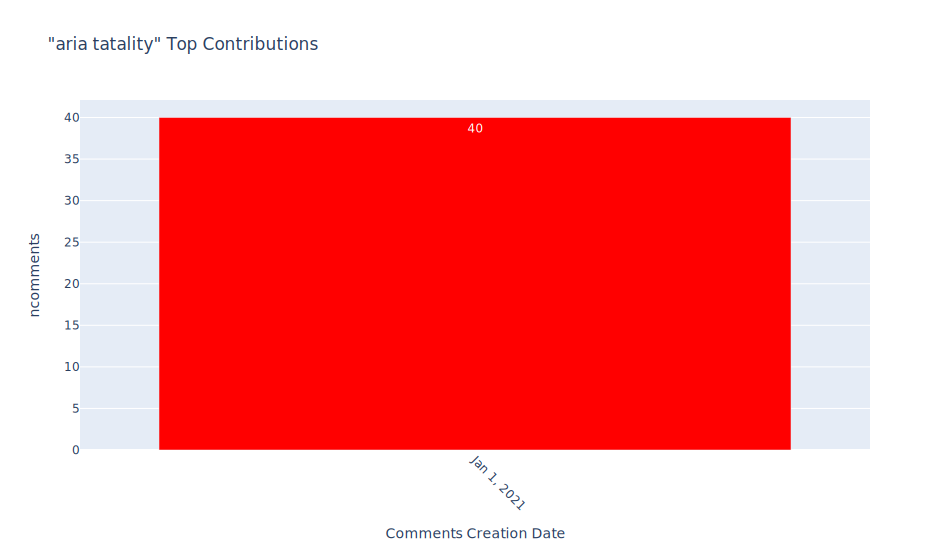

In [127]:
helpers.contr_peaks(df_comments, "aria tatality", n=5, threshold=0)

In [128]:
df_comments[df_comments.username == 'aria tatality'].text.value_counts().head(60)

your lies have been revealed to us you are not a victim you are just a traitor and a scoundrel who made our dear johnny depp sick    40
Name: text, dtype: int64

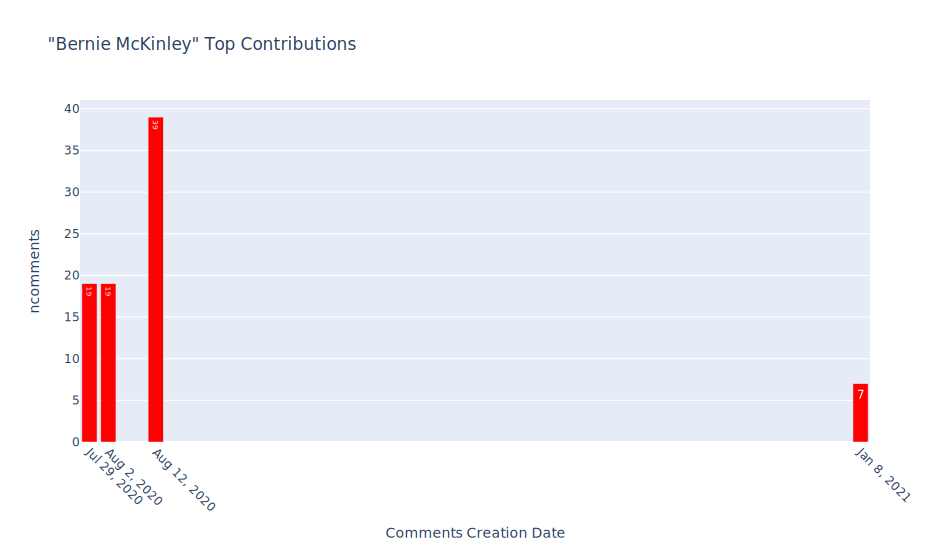

In [129]:
helpers.contr_peaks(df_comments, "Bernie McKinley", n=4, threshold=0)

In [130]:
df_comments[df_comments.username == 'Bernie McKinley'].text.value_counts().head(60)

https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                                                                                                                                                                                                                                                                                                                                                                       15
sign the petition to remove amber heard from aquaman 2 changeorg https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2                                                                                                                                                                                                                                                                                                                                                                      10
ju

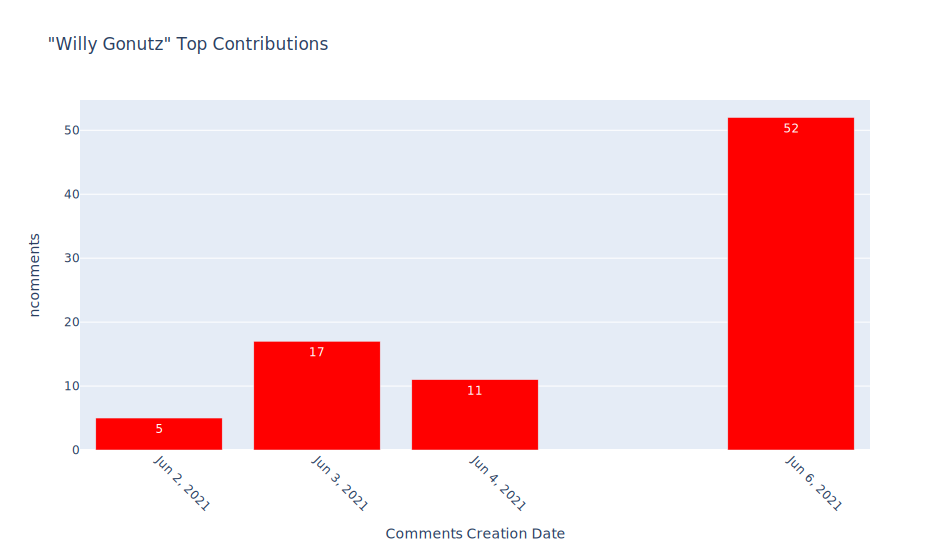

In [131]:
helpers.contr_peaks(df_comments, "Willy Gonutz", n=4, threshold=0)

In [132]:
df_comments[df_comments.username == 'Willy Gonutz'].text.value_counts().head(60)

remove ah from aquaman 2 sign the petition at: https://wwwchangeorg/p/dc entertainment remove amber heard from aquaman 2 18 million signatures and counting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

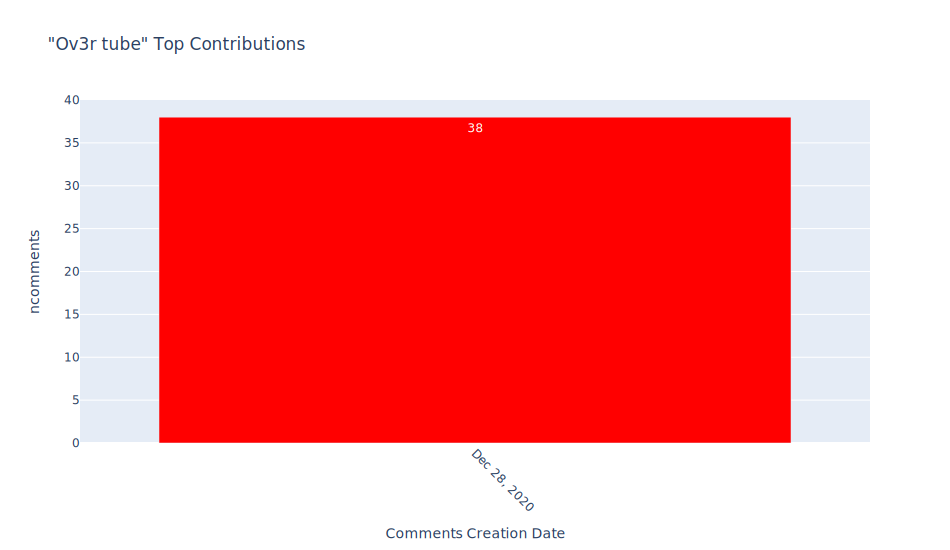

In [133]:
helpers.contr_peaks(df_comments, "Ov3r tube", n=5, threshold=0)

In [134]:
df_comments[df_comments.username == 'Ov3r tube'].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    38
Name: text, dtype: int64

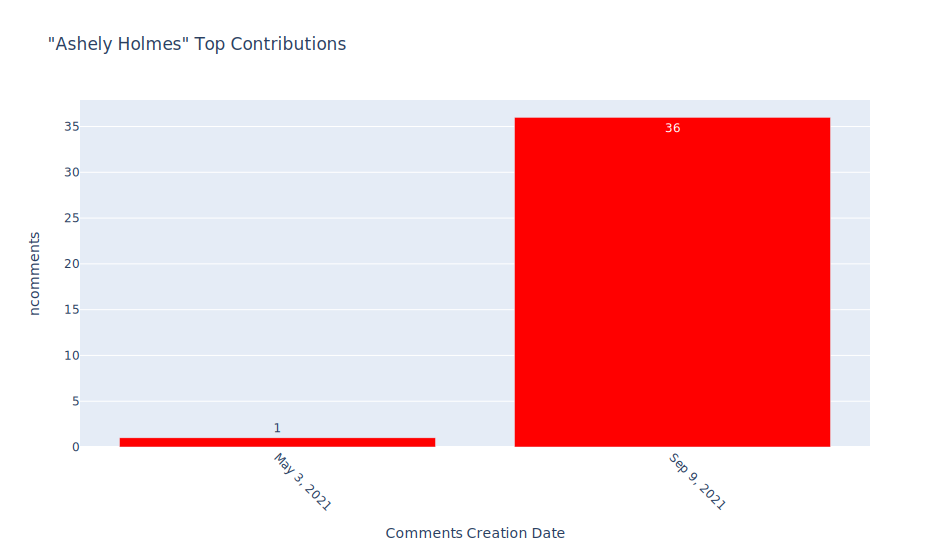

In [135]:
helpers.contr_peaks(df_comments, "Ashely Holmes", n=5, threshold=0)

In [136]:
df_comments[df_comments.username == "Ashely Holmes"].text.value_counts().head(60)

they have proof that she was the one being violent proof that she got makeup done to make it look like bruises proof that jd was the only one who had physical abuse and proof that jd is completely calm while she is trying to get a rise out of him because she wants to fight and he doesn't and proof that she was actively trying to ruin his career because she is a psychotic person who can't stand being dumped by a man!!! how is this still a question on who's the abuser?! how has this case not been solved? how is her career thriving while his is ending? all of his ex's came forward to tell everyone that jd was never abusive to them and always kind! how with all of this proof is she still the victim?! how has she not lost the case yet?! i'm completely baffled! this is the most ridiculous thing i've ever heard and seen! she is nothing but a complete and total psychopath who gets off on ruining the lives of anyone who dare try to get her out of their lives! she not only gets off on it but abs

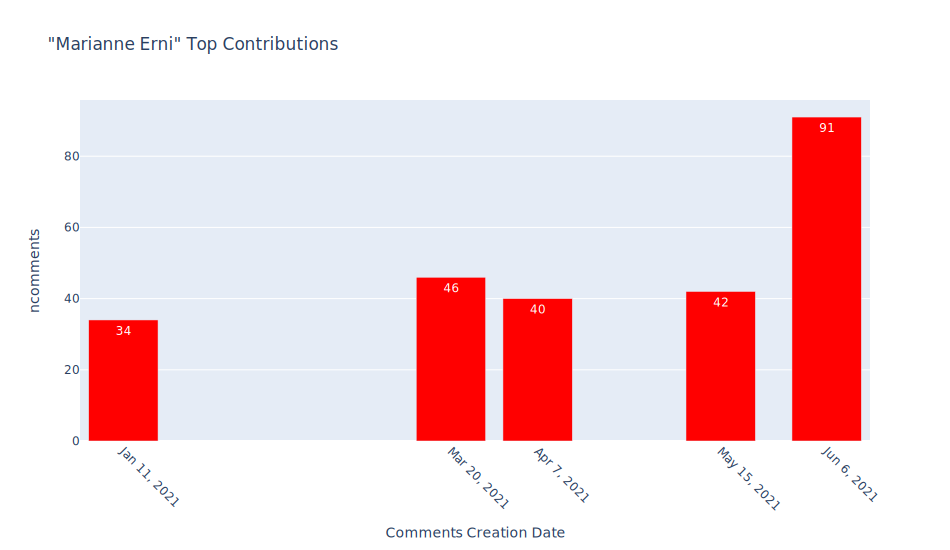

In [137]:
helpers.contr_peaks(df_comments, "Marianne Erni", n=5, threshold=0)

In [138]:
df_comments[df_comments.username == 'Marianne Erni'].text.value_counts().head(60)

the newest win is that the judge dismissed heards third request to dismiss the case                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              1
i do hope it as well but that nobody has so powerful and rich people on her side i do hope they will not be able to buy the jury or even the judge                                                                                                                                                                                                                                                                                   

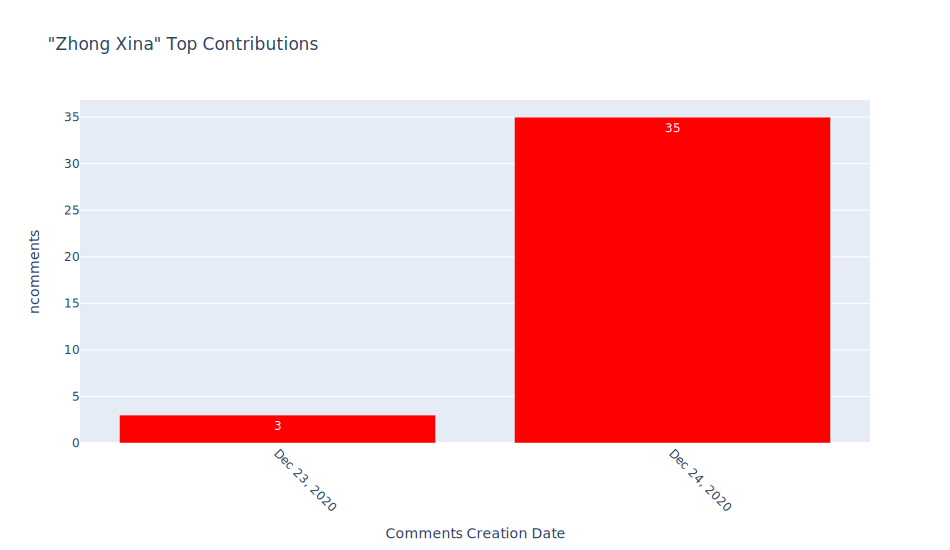

In [139]:
helpers.contr_peaks(df_comments, "Zhong Xina", n=2, threshold=0)

In [140]:
df_comments[df_comments.username == "Zhong Xina"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    38
principal* i'm sorry                                                 1
ok but why                                                           1
Name: text, dtype: int64

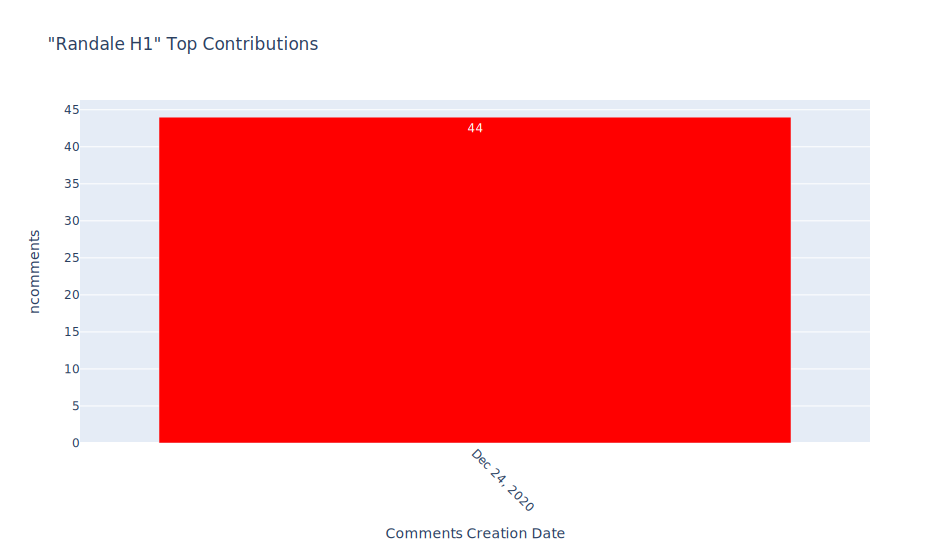

In [141]:
helpers.contr_peaks(df_comments, "Randale H1", n=5, threshold=0)

In [142]:
df_comments[df_comments.username == "Randale H1"].text.value_counts().head(60)

tell the world johnny tell them i johnny depp a man i'm a victim too of domestic violence and see how many people believe or side with you isn't that the real wording of her? or are you a parrot? of course it means the same but it seems to be a little bit hyprocritical to make a point with wrong arguments/quotes? pls proof me wrong!    18
tell the world johnny tell them i johnny depp a man i'm a victim too of domestic violence and see how many people believe or side with you isn't that the real wording of her? of course it means the same but it seems to be a little bit hyprocritical to make a point with wrong arguments? pls proof me wrong!                                 8
tell the world johnny tell them i johnny depp a man i'm a victim too of domestic violence and see how many people believe or side with you isn't that the real wording of her? of course it means the same but it seems to be a little bit hyprocritical to make a point with wrong arguments/quotes? pls proof me wrong!     

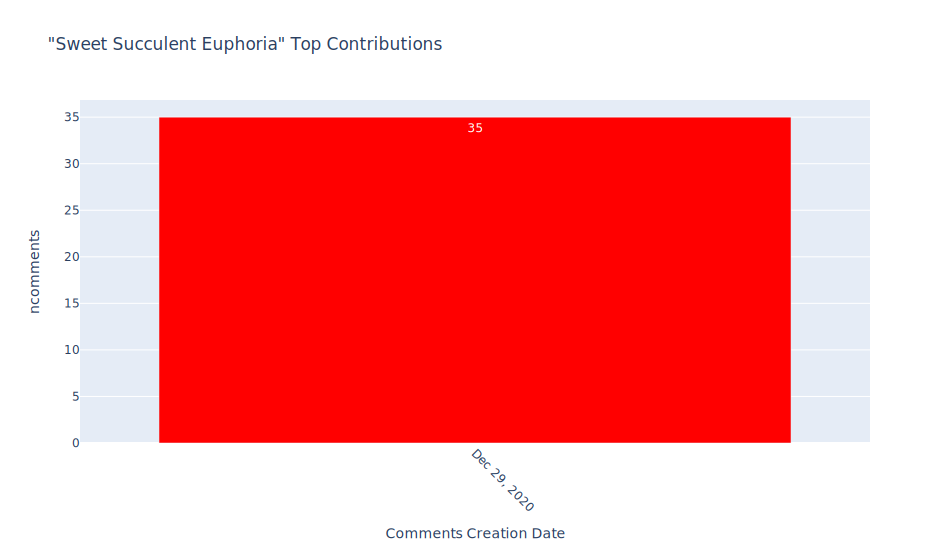

In [143]:
helpers.contr_peaks(df_comments, "Sweet Succulent Euphoria", n=5, threshold=0)

In [144]:
df_comments[df_comments.username == "Sweet Succulent Euphoria"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    35
Name: text, dtype: int64

<br>

<a id='victim'></a>
>> ## Contains "Victim"
> <ul>
 <li><a href="#negative_comments">Negative Comments</a></li>
    <li><a href="#victim"><b>Contains "Victim"</b></a></li>
 <li><a href="#no_victim">Negative Comments Without "Victim"</a></li>
 </ul>

In [145]:
df_victim = df_comments[df_comments.text.str.contains('victim')]
print(df_victim.shape)

(103766, 20)


In [146]:
# exclude all the users with positive comments
df_victim = df_victim[~df_victim.username.isin(pos_users)]
print(df_victim.shape)
df_victim.head(2)

(101668, 20)


video_id                 comment_etag                  comment_id  \
2031  MZGyGk0xBlw  cz-SMsQ5YsMXCcFcofJ-_UQK_j0  UgybCR6PJSFIo6r2SoB4AaABAg   
4350  ytIfSuy_mOA  nINkcugZNvHUeUwYFyBb5LlbYw0  Ugz5XLZu8khN6WD96fN4AaABAg   

                                                   text           username  \
2031  she chose jail? talk about cut of your nose to...  Tennille Sinclair   
4350  transplanted niggas from africa to jamaica hap...         Yoli Goodi   

                  author_ch_id  nlikes                   p_dtime  \
2031  UCtKqWUdvuCILr3ztDYBMqMw     0.0 2013-01-20 06:09:50+00:00   
4350  UCLXEPLpoMh3-YCiS950bxFw     0.0 2013-05-18 17:16:57+00:00   

                       u_dtime  nreplies moderation_status comment_reply  \
2031 2013-01-20 06:09:50+00:00       0.0               NaN       comment   
4350 2013-05-18 17:16:57+00:00       0.0               NaN       comment   

     parent_id author_ch_url author_profile_image  year       date month  \
2031      none          none                 none  2013 2013-01-20   Jan   
4350      none          none                 none  2013 2013-05-18   May   

      dayofmonth  hour  
2031          20     6  
4350          18    17

### A Heat Map for the Comments Containing "Victim" 


Note: The Peaks on Feb, Dec 2020



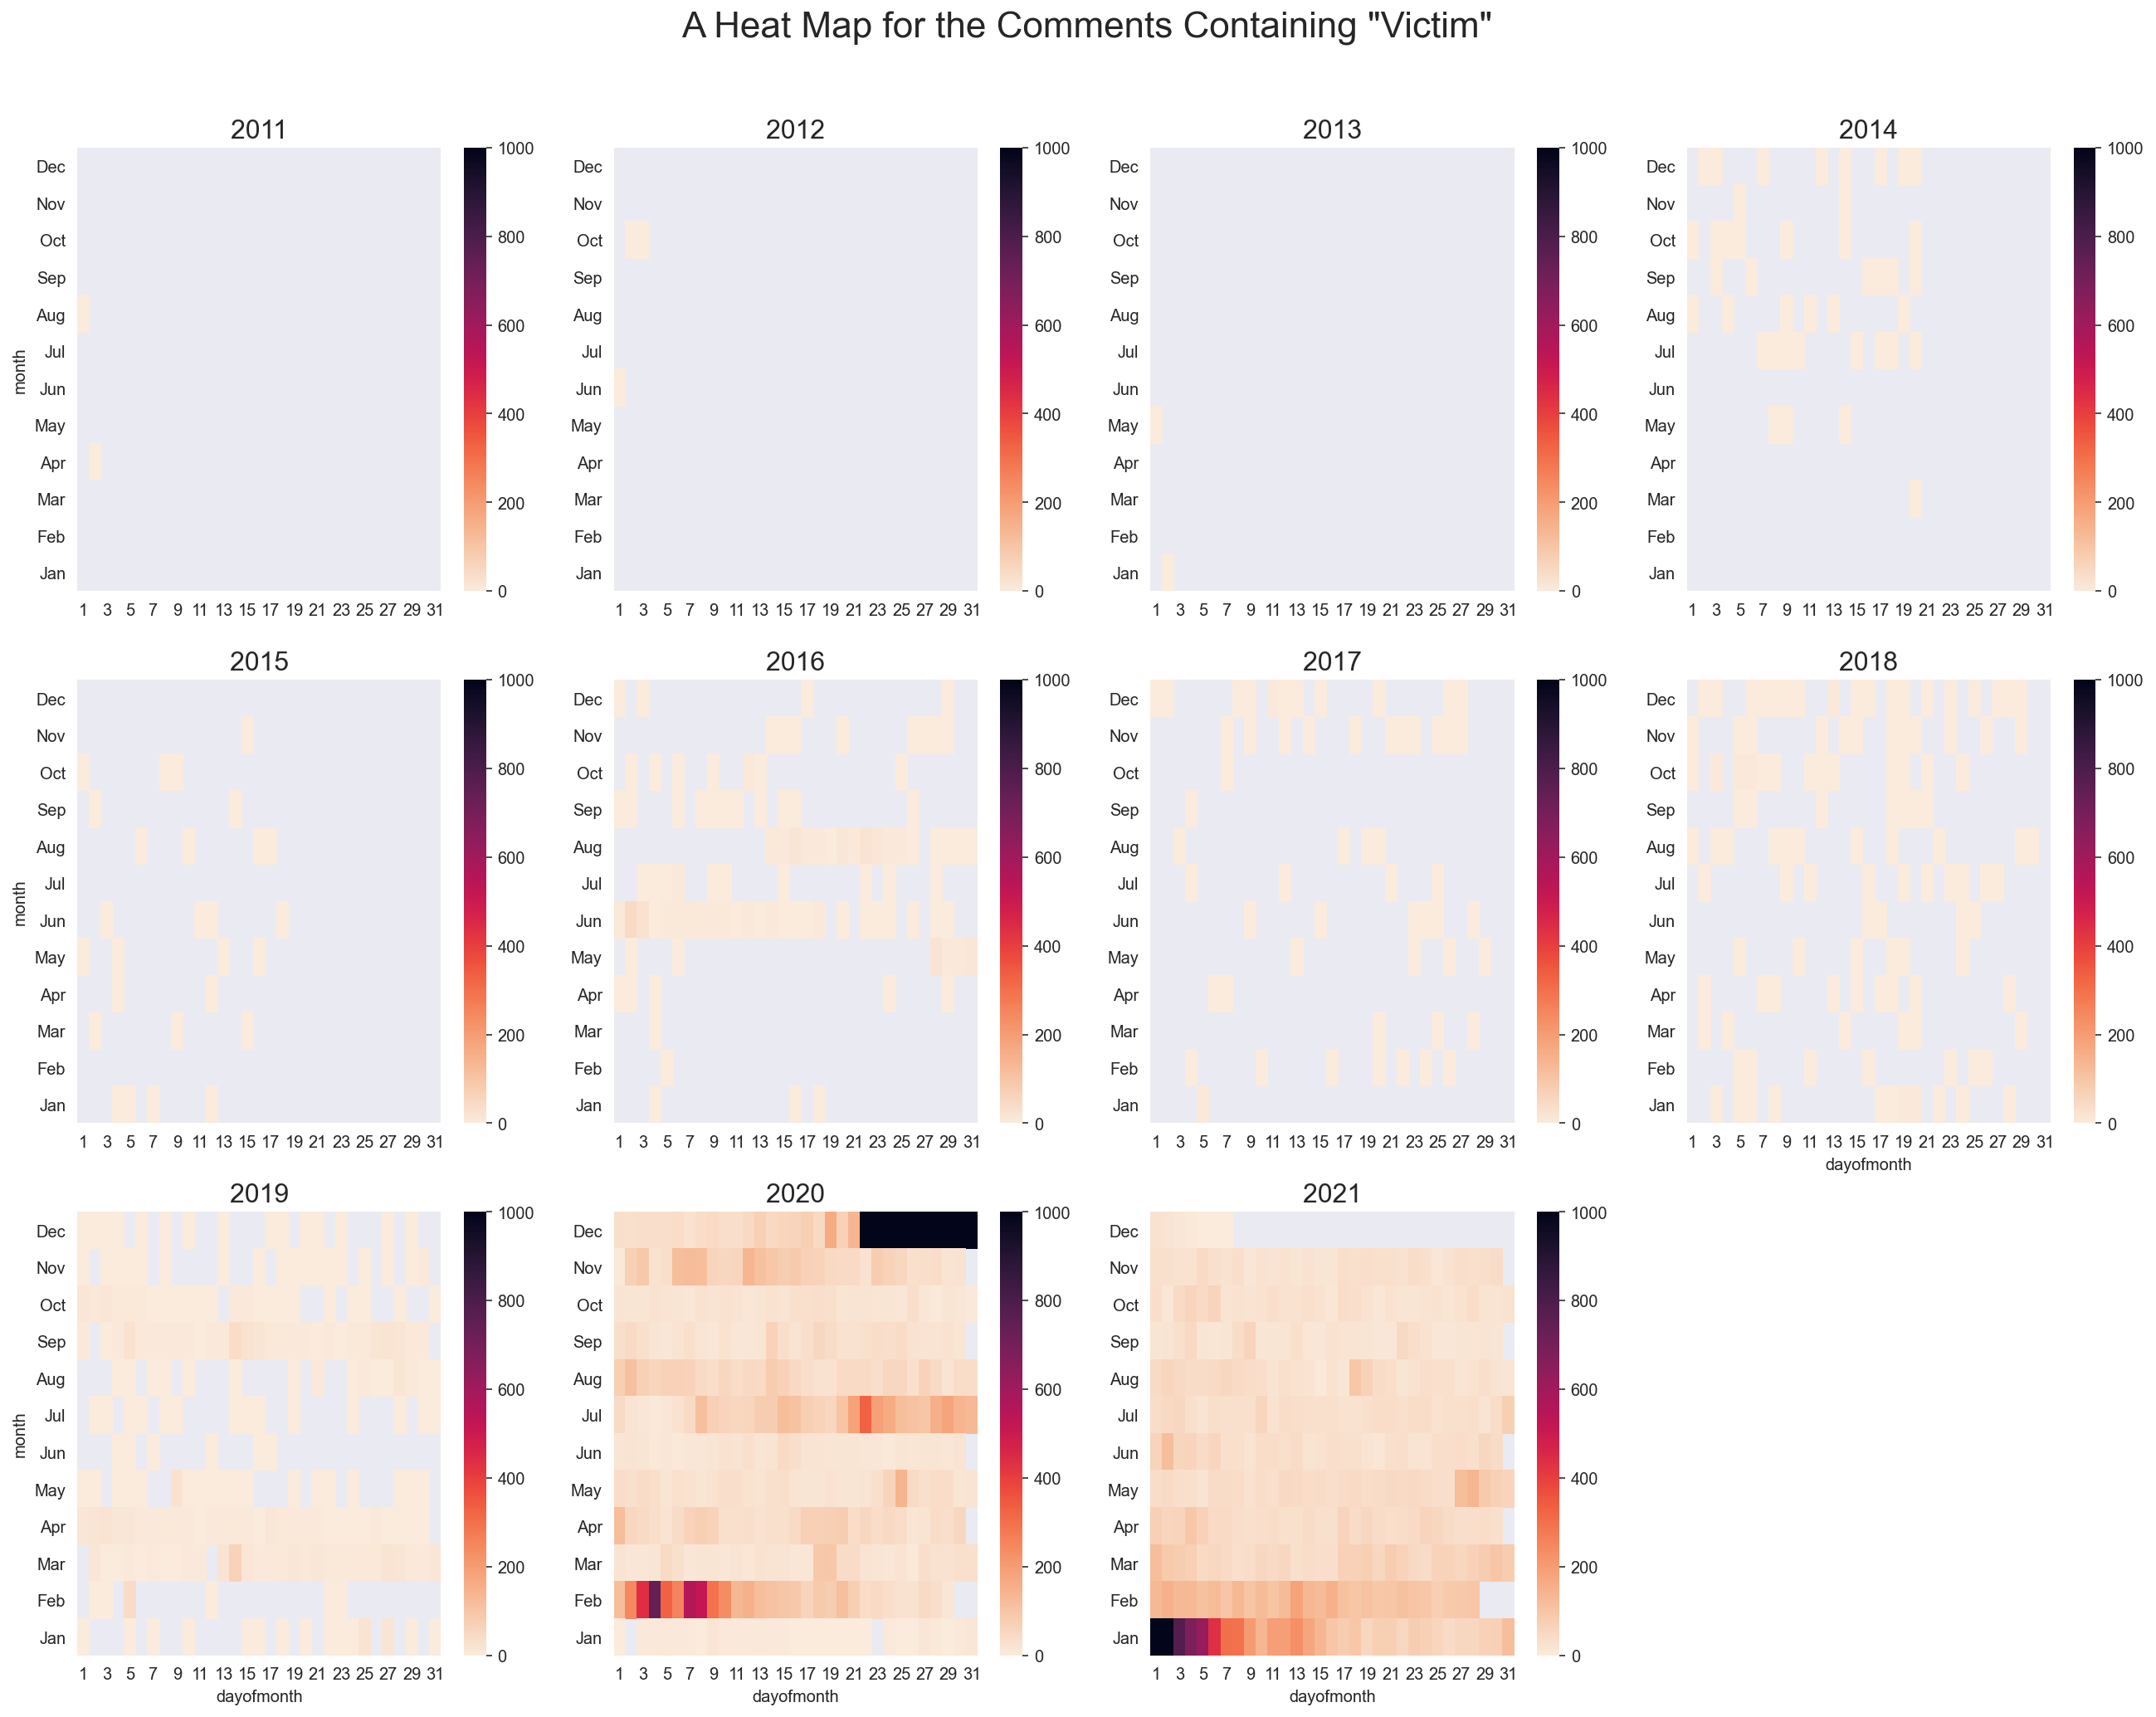

In [147]:
victim_daily = df_victim.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='ncomments')

print('\nNote: The Peaks on Feb, Dec 2020\n')
title = 'A Heat Map for the Comments Containing "Victim"'
helpers.facet_heat(victim_daily, title, n_col=4, vmax=1000)

In [148]:
df_victim.username.nunique()

84241

### Top Users with Comments Containing "victim" keyword

In [149]:
df_nvictim = df_victim.groupby('username').agg({'text':'count', 'nreplies': 'sum', 'nlikes': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'})

print(df_nvictim.shape)
df_nvictim = df_nvictim.sort_values('ncomments', ascending=False)
df_nvictim.head(15)


(84241, 4)


username  ncomments  nreplies  nlikes
32814                            Julie Lea        140      23.0   616.0
38691                                Lotta         79       0.0    35.0
67181                       Yalonda Howell         77      70.0   179.0
15222                             Damn ...         62       0.0    17.0
61293           The Amber Heard Playlist!!         61      29.0     3.0
11517                        Carmen Castro         59      18.0   750.0
14338                            Crispy Co         54      28.0   754.0
32903                          June Harris         52      14.0   407.0
73578                               k. _nf         52      17.0  2029.0
36778                       Laura Peterson         50      17.0   223.0
40921                        Marianne Erni         47       5.0   118.0
62598                            Tiffany C         45      18.0   138.0
84060  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         44      10.0   879.0
51093                      Queen Babylonia         44      11.0   326.0
22669                        Frost_Daghers         43       0.0    10.0

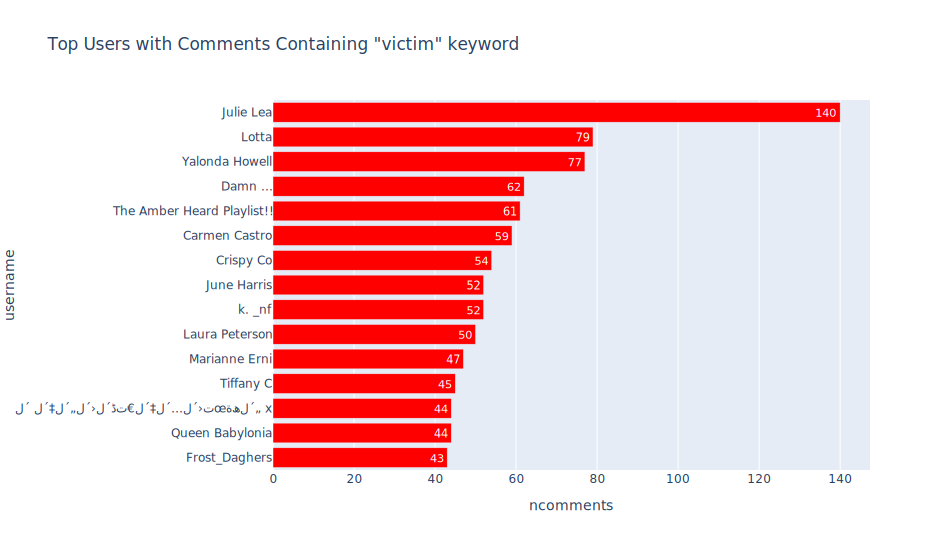

In [150]:
helpers.barh(df_nvictim[['username', 'ncomments']].head(15), 
             'Top Users with Comments Containing "victim" keyword', threshold=0)

### "victim" Users Contributions on Each Date

In [151]:
df_v = df_victim.groupby(['date', 'username']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

df_v.head(15)


date                             username  ncomments  nlikes  \
64417 2020-12-29                             Damn ...         62    17.0   
34434 2020-12-25                        Frost_Daghers         43    10.0   
75574 2021-01-01                        aria tatality         40     0.0   
729   2019-02-05                                Lotta         40    10.0   
60587 2020-12-28                            Ov3r tube         38   210.0   
92893 2021-09-09                        Ashely Holmes         36    35.0   
77229 2021-01-02  ل´ ل´‡ل´„ل´›ل´ڈت€ل´‡ل´…ل´›تœةھل´„ x         36    27.0   
31026 2020-12-24                           Randale H1         35     9.0   
32249 2020-12-24                           Zhong Xina         35  1582.0   
66805 2020-12-29             Sweet Succulent Euphoria         35   981.0   
62971 2020-12-28                            you good?         35    12.0   
83815 2021-02-13                          My thoughts         33   232.0   
22903 2020-12-23                         Kabir Mishra         33     0.0   
73577 2020-12-31                      Sophia Cabaأ±ez         32     9.0   
51928 2020-12-27                             Overtube         31   533.0   

       nreplies  
64417       0.0  
34434       0.0  
75574       1.0  
729         0.0  
60587       0.0  
92893       9.0  
77229       2.0  
31026       0.0  
32249       0.0  
66805       0.0  
62971       0.0  
83815       4.0  
22903       0.0  
73577       0.0  
51928       1.0

### "victim" Peak Dates

In [152]:
victim_dates = df_victim.groupby(['date']).agg({'text':'count', 'nlikes': 'sum', 'nreplies': 'sum'}).reset_index(
).rename(columns={'text':'ncomments'}).sort_values('ncomments', ascending=False)

victim_dates.head(15)

date  ncomments    nlikes  nreplies
921 2020-12-27      12057  170498.0     535.0
920 2020-12-26       8860  167695.0     503.0
917 2020-12-23       7472  226336.0    1041.0
922 2020-12-28       7270   86219.0     332.0
918 2020-12-24       6816  230859.0     826.0
923 2020-12-29       5180   82651.0     427.0
924 2020-12-30       3929   69646.0     165.0
919 2020-12-25       3606   84320.0     327.0
925 2020-12-31       2268   42312.0     242.0
926 2021-01-01       1932   35628.0     261.0
927 2021-01-02       1422   21503.0      63.0
916 2020-12-22       1419   69472.0     266.0
928 2021-01-03        785   13233.0      89.0
594 2020-02-04        740   24873.0     542.0
929 2021-01-04        682   12924.0     142.0

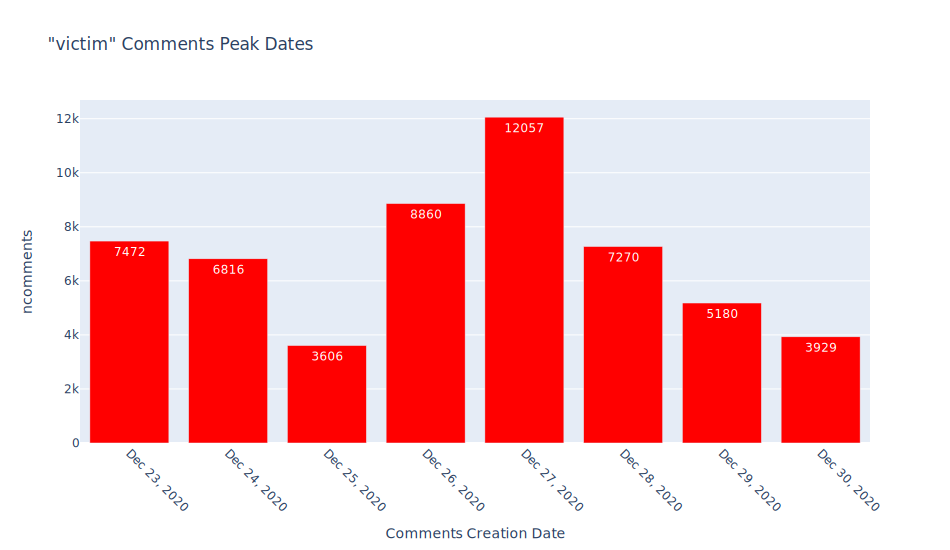

In [153]:
helpers.bar_peaks(victim_dates[['date', 'ncomments']].head(8), 
                  '"victim" Comments Peak Dates')

In [154]:
df_victim.text.value_counts().head(60)

they won't believe you because you are a man she is not a victim                                                                               43276
they won't believe you because you are a man amber heard she is not a victim                                                                    1595
they won't believe you because you are a man she is not the victim                                                                              1331
she is not a victim                                                                                                                             1109
they wont believe you because you are a man she is not a victim                                                                                 1019
they won't believe you because your a man she is not a victim                                                                                   1010
they won't believe you because you are a man she is not a victim!                                         

<br>

### More Investigations on Top Users Commented with "victim" Keyword

In [155]:
set(df_v.username.head(15)) - set(df_n.username.head(15))

{'Kabir Mishra', 'My thoughts', 'Overtube', 'Randale H1', 'Sophia Cabaأ±ez'}

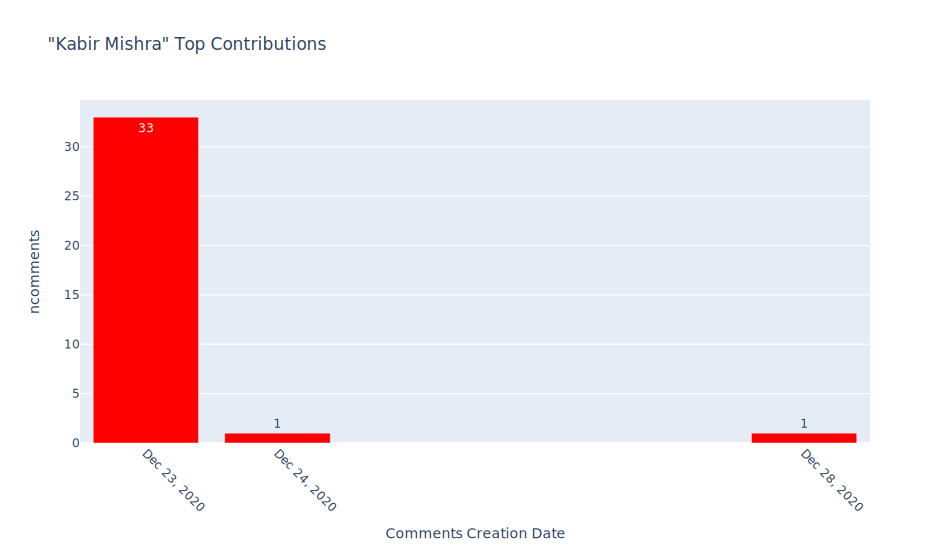

In [156]:
helpers.contr_peaks(df_comments, "Kabir Mishra", n=5, threshold=0)

In [157]:
df_comments[df_comments.username == "Kabir Mishra"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    34
#justiceforjohnnydepp                                                1
Name: text, dtype: int64

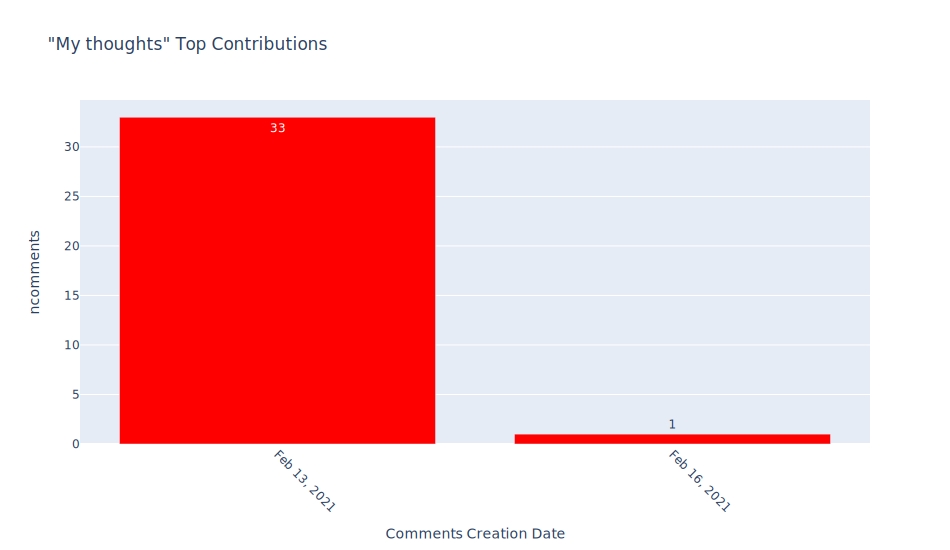

In [158]:
helpers.contr_peaks(df_comments, "My thoughts", n=5, threshold=0)

In [159]:
df_comments[df_comments.username == "My thoughts"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim!                 33
@collin willoughs ok so called koolًںک‚ًںک‚u can do nothing ًں¥؛stupidًں‘چًںڈ»     1
Name: text, dtype: int64

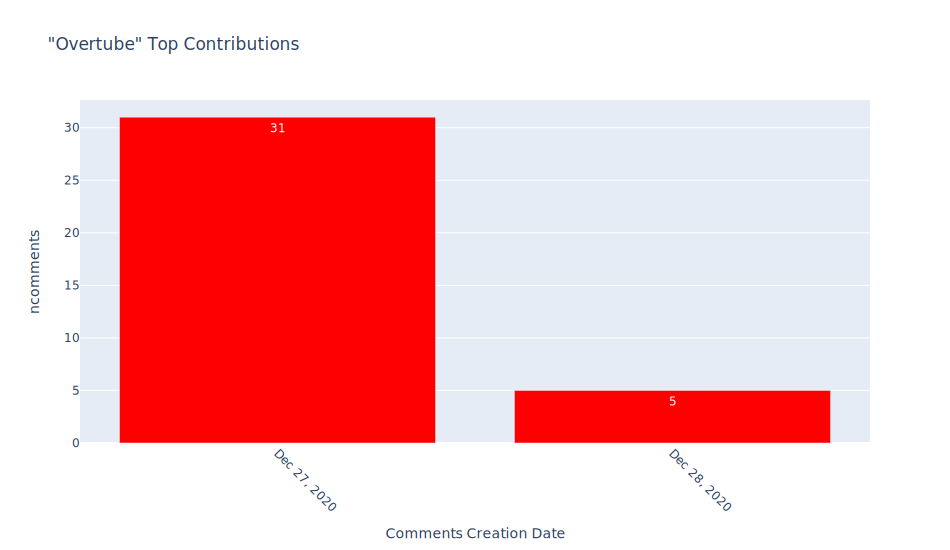

In [160]:
helpers.contr_peaks(df_comments, "Overtube", n=5, threshold=0)

In [161]:
df_comments[df_comments.username == "Overtube"].text.value_counts().head(60)

they won't believe you because you are a man she is not a victim    35
@mionfel trying my best to do 100 replies fuck errors                1
Name: text, dtype: int64

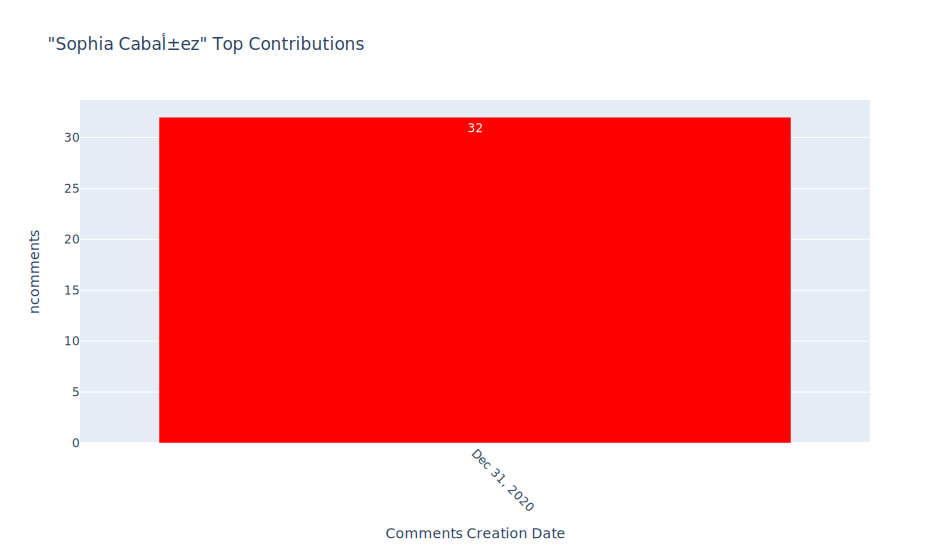

In [162]:
helpers.contr_peaks(df_comments, "Sophia Cabaأ±ez", n=5, threshold=0)

In [163]:
df_comments[df_comments.username == "Sophia Cabaأ±ez"].text.value_counts().head(60)

*she is not a victim*                                                 17
they won't believe you because you are a man *she is not a victim*    15
Name: text, dtype: int64

<br>

<a id='no_victim'></a>
>> ## Negative Comments Without "Victim"
> <ul>
 <li><a href="#negative_comments">Negative Comments</a></li>
 <li><a href="#victim">Contains "Victim"</a></li>
    <li><a href="#no_victim"><b>Negative Comments Without "Victim"</b></a></li>
 </ul>

In [164]:
# Create a negative dataframe without 'victim' keyword --> to see more negative text variations
df_neg = df_neg_total[~df_neg_total.text.str.contains('victim')]
print(df_neg.shape)
df_neg.head(2)

(279558, 20)


video_id                 comment_etag                  comment_id  \
39   VPUUrdgxIa8  N0IcnfXWAATmNc7PATmVsXq5-58  UgycOQe20TUYIOyB5zR4AaABAg   
120  VPUUrdgxIa8  qorqkViON0Ig3VMl0EmlAvX5H3E  UgztIGiBkAiBgyO03rR4AaABAg   

                                                  text            username  \
39   whoa hold on there buddy are you saying that p...  lowdownshakinchill   
120  it was part of an idiotic series of comments w...               jsssm   

                 author_ch_id  nlikes                   p_dtime  \
39   UCCOdIP_feMgW00kp1fiE8fg     0.0 2013-09-01 18:55:13+00:00   
120  UCv0UUMS3TZgn68PnWDWAVpw     0.0 2013-08-15 22:56:15+00:00   

                      u_dtime  nreplies moderation_status comment_reply  \
39  2013-09-01 18:55:13+00:00       0.0               NaN       comment   
120 2013-08-15 22:56:15+00:00       0.0               NaN       comment   

    parent_id author_ch_url author_profile_image  year       date month  \
39       none          none                 none  2013 2013-09-01   Sep   
120      none          none                 none  2013 2013-08-15   Aug   

     dayofmonth  hour  
39            1    18  
120          15    22

In [165]:
df_neg.text.value_counts().head(60)

exposed                                                                                                                                                                                                                                                                                                                  752
amber turd                                                                                                                                                                                                                                                                                                               662
exposed!!!                                                                                                                                                                                                                                                                                                               517
abuser                                           

In [166]:
df_neg.text.value_counts()[60:].head(60)

go to hell                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [167]:
df_neg.text.value_counts()[120:].head(60)

i hope she gets what she deserves                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [168]:
df_neg.text.value_counts()[180:].head(60)

i hate this bitch                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [169]:
df_neg.text.value_counts()[240:].head(60)

she is batshit crazy                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [170]:
df_neg.text.value_counts()[300:].head(60)

amber heard is a narcissist                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [171]:
df_neg.text.value_counts()[360:].head(60)

she is a liar!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<br>

<a id='top_comments'></a>
>## Most Repeated Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Peak Dates</a></li>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments"><b>Most Repeated Comments</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 </ul>

In [172]:
df_comments.text.value_counts().head(30)

they won't believe you because you are a man she is not a victim                                                                                                                                                                                                                                                                                      43370
that's crazy                                                                                                                                                                                                                                                                                                                                           5968
#justiceforjohnnydepp                                                                                                                                                                                                                                                                                           

<a id='same'></a>
>## Same Text Same Date
> <ul>
 <li><a href="#text_investigation">Primary Text Investigation</a></li>
 <li><a href="#spam">Likely Spam</a></li>
 <li><a href="#pos_comments">Positive Comments</a></li>
 <li><a href="#threat_comments">Threat Comments</a></li>
 <li><a href="#neg_comments">Negative Comments</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
 </ul>

In [173]:
df_comments.head(1)

video_id                 comment_etag            comment_id        text  \
0  DiXRVYRZchs  mvtTos5huTqXhtAs-JPzt7mls_A  UgjyORuX3p35VXgCoAEC  good work!   

        username              author_ch_id  nlikes                   p_dtime  \
0  Shocka Delica  UC6cJzw3ChENHVREKzpx1e3Q     9.0 2013-11-29 05:18:47+00:00   

                    u_dtime  nreplies moderation_status comment_reply  \
0 2013-11-29 05:18:47+00:00       1.0               NaN       comment   

  parent_id author_ch_url author_profile_image  year       date month  \
0      none          none                 none  2013 2013-11-29   Nov   

   dayofmonth  hour  
0          29     5

In [174]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = df_comments.groupby(["text", "date"]).agg({'comment_id':'count', 'nreplies':'sum', 'nlikes':'sum'}).reset_index()
df_same.rename(columns={'comment_id': 'ncomments'}, inplace=True) 
df_same.sort_values(["ncomments", 'date'], ascending=[False, True]).head(60)


text       date  \
1641232  they won't believe you because you are a man s... 2020-12-27   
1641231  they won't believe you because you are a man s... 2020-12-26   
1641233  they won't believe you because you are a man s... 2020-12-28   
1641228  they won't believe you because you are a man s... 2020-12-23   
1641229  they won't believe you because you are a man s... 2020-12-24   
1641234  they won't believe you because you are a man s... 2020-12-29   
1641235  they won't believe you because you are a man s... 2020-12-30   
1641230  they won't believe you because you are a man s... 2020-12-25   
1639882  they won't believe you because you are a man a... 2020-12-22   
1641236  they won't believe you because you are a man s... 2020-12-31   
1641237  they won't believe you because you are a man s... 2021-01-01   
1641238  they won't believe you because you are a man s... 2021-01-02   
1640216  they won't believe you because you are a man a... 2020-12-22   
1640217  they won't believe you because you are a man a... 2020-12-23   
1641239  they won't believe you because you are a man s... 2021-01-03   
1641240  they won't believe you because you are a man s... 2021-01-04   
1641241  they won't believe you because you are a man s... 2021-01-05   
1644678  they won't believe you because your a man she ... 2020-12-30   
1646192  they wont believe you because you are a man am... 2020-12-22   
1639508       they won't believe you because you are a man 2020-12-23   
1644677  they won't believe you because your a man she ... 2020-12-29   
1643059  they won't believe you because you are a man s... 2020-12-27   
1044277                                 justice for johnny 2020-12-22   
1552926                                       that's crazy 2021-03-03   
1643056  they won't believe you because you are a man s... 2020-12-24   
1641242  they won't believe you because you are a man s... 2021-01-06   
1639883  they won't believe you because you are a man a... 2020-12-23   
1646347  they wont believe you because you are a man sh... 2020-12-27   
520858                                    execute order 66 2020-12-22   
1643058  they won't believe you because you are a man s... 2020-12-26   
1646346  they wont believe you because you are a man sh... 2020-12-26   
1552916                                       that's crazy 2021-02-21   
1644583  they won't believe you because your a man ambe... 2020-12-22   
6951                                       #justicefordepp 2020-11-08   
1401859                                she is not a victim 2020-12-24   
1641243  they won't believe you because you are a man s... 2021-01-07   
1643055  they won't believe you because you are a man s... 2020-12-23   
1639507       they won't believe you because you are a man 2020-12-22   
1641244  they won't believe you because you are a man s... 2021-01-08   
578111                         good soldiers follow orders 2020-12-26   
1641249  they won't believe you because you are a man s... 2021-01-13   
7437                                     #justiceforjohnny 2020-12-22   
1642737  they won't believe you because you are a man s... 2020-12-27   
1044278                                 justice for johnny 2020-12-23   
1642736  they won't believe you because you are a man s... 2020-12-26   
1401858                                she is not a victim 2020-12-23   
1552928                                       that's crazy 2021-03-05   
1552933                                       that's crazy 2021-03-10   
1639509       they won't believe you because you are a man 2020-12-24   
1963694  your lies have been revealed to us you are not... 2021-01-01   
1552934                                       that's crazy 2021-03-11   
8456                                 #justiceforjohnnydepp 2020-12-24   
1876342                                                wow 2020-10-24   
1552927                                       that's crazy 2021-03-04   
7438                                   

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>